# UNSW_NB15 - MIN0150

In [2]:
import pandas as pd # dataframes
import numpy as np # matrices and linear algebra
import matplotlib.pyplot as plt # plotting
import seaborn as sns # another matplotlib interface - styled and easier to use
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, PowerTransformer, RobustScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score
import itertools

In [3]:
train = pd.read_csv('https://sch.patrick115.eu/UNSW_NB15_training-set.csv', sep=',', storage_options={'User-Agent': 'Mozilla/5.0'})
test = pd.read_csv('https://sch.patrick115.eu/UNSW_NB15_testing-set.csv', sep=',', storage_options={'User-Agent': 'Mozilla/5.0'})

In [4]:
train

id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
0          1  0.000011   udp       -   INT      2      0     496       0   
1          2  0.000008   udp       -   INT      2      0    1762       0   
2          3  0.000005   udp       -   INT      2      0    1068       0   
3          4  0.000006   udp       -   INT      2      0     900       0   
4          5  0.000010   udp       -   INT      2      0    2126       0   
...      ...       ...   ...     ...   ...    ...    ...     ...     ...   
82327  82328  0.000005   udp       -   INT      2      0     104       0   
82328  82329  1.106101   tcp       -   FIN     20      8   18062     354   
82329  82330  0.000000   arp       -   INT      1      0      46       0   
82330  82331  0.000000   arp       -   INT      1      0      46       0   
82331  82332  0.000009   udp       -   INT      2      0     104       0   

                rate  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
0       90909.090200  ...                 1               2             0   
1      125000.000300  ...                 1               2             0   
2      200000.005100  ...                 1               3             0   
3      166666.660800  ...                 1               3             0   
4      100000.002500  ...                 1               3             0   
...              ...  ...               ...             ...           ...   
82327  200000.005100  ...                 1               2             0   
82328      24.410067  ...                 1               1             0   
82329       0.000000  ...                 1               1             0   
82330       0.000000  ...                 1               1             0   
82331  111111.107200  ...                 1               1             0   

       ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  \
0               0                 0           1           2                0   
1               0                 0           1           2                0   
2               0                 0           1           3                0   
3               0                 0           2           3                0   
4               0                 0           2           3                0   
...           ...               ...         ...         ...              ...   
82327           0                 0           2           1                0   
82328           0                 0           3           2                0   
82329           0                 0           1           1                1   
82330           0                 0           1           1                1   
82331           0                 0           1           1                0   

       attack_cat  label  
0          Normal      0  
1          Normal      0  
2          Normal      0  
3          Normal      0  
4          Normal      0  
...           ...    ...  
82327      Normal      0  
82328      Normal      0  
82329      Normal      0  
82330      Normal      0  
82331      Normal      0  

[82332 rows x 45 columns]

In [5]:
test

id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
0            1  0.121478   tcp       -   FIN      6      4     258     172   
1            2  0.649902   tcp       -   FIN     14     38     734   42014   
2            3  1.623129   tcp       -   FIN      8     16     364   13186   
3            4  1.681642   tcp     ftp   FIN     12     12     628     770   
4            5  0.449454   tcp       -   FIN     10      6     534     268   
...        ...       ...   ...     ...   ...    ...    ...     ...     ...   
175336  175337  0.000009   udp     dns   INT      2      0     114       0   
175337  175338  0.505762   tcp       -   FIN     10      8     620     354   
175338  175339  0.000009   udp     dns   INT      2      0     114       0   
175339  175340  0.000009   udp     dns   INT      2      0     114       0   
175340  175341  0.000009   udp     dns   INT      2      0     114       0   

                 rate  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
0           74.087490  ...                 1               1             0   
1           78.473372  ...                 1               2             0   
2           14.170161  ...                 1               3             0   
3           13.677108  ...                 1               3             1   
4           33.373826  ...                 1              40             0   
...               ...  ...               ...             ...           ...   
175336  111111.107200  ...                13              24             0   
175337      33.612649  ...                 1               2             0   
175338  111111.107200  ...                 3              13             0   
175339  111111.107200  ...                14              30             0   
175340  111111.107200  ...                16              30             0   

        ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  \
0                0                 0           1           1                0   
1                0                 0           1           6                0   
2                0                 0           2           6                0   
3                1                 0           2           1                0   
4                0                 0           2          39                0   
...            ...               ...         ...         ...              ...   
175336           0                 0          24          24                0   
175337           0                 0           1           1                0   
175338           0                 0           3          12                0   
175339           0                 0          30          30                0   
175340           0                 0          30          30                0   

        attack_cat  label  
0           Normal      0  
1           Normal      0  
2           Normal      0  
3           Normal      0  
4           Normal      0  
...            ...    ...  
175336     Generic      1  
175337   Shellcode      1  
175338     Generic      1  
175339     Generic      1  
175340     Generic      1  

[175341 rows x 45 columns]

In [6]:
train.shape

(82332, 45)

In [7]:
test.shape

(175341, 45)

Ještě před tím, než začneme, tak vidíme, že train data mají 82332 řádků a testovací data 175341, což je zajímavé, protože co jsme si říkali, tak se trénovací a testovací data dělí 80:20, nebo i jiný poměr, ale nepříjde mi, že by testovacích dat mělo být více. Co jsem si tak hledal, tak někde se říká, že čím větší testovací data tím líp, autor datasetu to asi tak dělá z nějakého důvodu, možná dataset obsahuje hodně různých případů, aby se opravdu otestovalo, že model je schopný predikovat různé situace.

Pro popis dat můžeme využít csv dostupný u datasetu:

1. srcip (nominal) - Zdrojová IP adresa
2. sport (integer) - Zdrojové číslo portu
3. dstip (nominal) - Cílová IP adresa
4. dsport (integer) - Cílové číslo portu
5. proto (nominal) - Protokol
6. state (nominal) - Stav a jeho závislý protokol (např. ACC, CLO, CON, ECO, ECR, FIN, INT, MAS, PAR, REQ, RST, TST, TXD, URH, URN, a (-) (pokud stav není použit))
7. dur (Float) - Celková doba záznamu
8. sbytes (Integer) - Počet bajtů ze zdroje na cíl
9. dbytes (integer) - Počet bajtů z cíle na zdroj
10. sttl (integer) - Hodnota TTL (Time To Live) ze zdroje na cíl
11. dttl (integer) - Hodnota TTL z cíle na zdroj
12. sloss (integer) - Počet paketů ze zdroje, které byly retransmitovány nebo ztraceny
13. dloss (integer) - Počet paketů z cíle, které byly retransmitovány nebo ztraceny
14. service (nominal) - Použitá služba (např. http, ftp, smtp, ssh, dns, ftp-data, irc, nebo -, pokud služba není často používaná)
15. Sload (float) - Rychlost přenosu bitů ze zdroje (b/s)
16. Dload (float) - Rychlost přenosu bitů z cíle (b/s)
17. Spkts (integer) - Počet paketů ze zdroje na cíl
18. Dpkts (integer) - Počet paketů z cíle na zdroj
19. swin (integer) - Zdrojová hodnota TCP window (TCP okno je divný)
20. dwin (integer) - Cílová hodnota TCP window
21. stcpb (integer) - Pořadové číslo TCP ze zdroje - https://cs.wikipedia.org/wiki/Transmission_Control_Protocol#%C4%8C%C3%ADslov%C3%A1n%C3%AD_byt%C5%AF
22. dtcpb (integer) - Pořadové číslo TCP z cíle
23. smeansz (integer) - Průměrná velikost paketů odeslaných ze zdroje
24. dmeansz (integer) - Průměrná velikost paketů odeslaných z cíle
25. trans_depth (integer) - Hloubka transakce (počet pipelined požadavků/odpovědí v připojení HTTP)
26. res_bdy_len (integer) - Velikost nekomprimovaného obsahu přeneseného z HTTP serveru
27. Sjit (float) - Jitter (zpoždění) zdroje (v ms)
28. Djit (float) - Jitter cíle (v ms)
29. Stime (timestamp) - Čas začátku záznamu
30. Ltime (timestamp) - Čas konce záznamu
31. Sintpkt (float) - Interval mezi příchozími pakety ze zdroje (v ms)
32. Dintpkt (float) - Interval mezi příchozími pakety z cíle (v ms)
33. tcprtt (float) - Round-trip time pro nastavení TCP spojení (součet synack a ackdat)
34. synack (float) - Čas nastavení TCP spojení mezi SYN a SYN_ACK paketem
35. ackdat (float) - Čas nastavení TCP spojení mezi SYN_ACK a ACK paketem
36. is_sm_ips_ports (binary) - Indikátor, zda jsou IP adresy i porty zdroje a cíle stejné (1 = ano, 0 = ne)
37. ct_state_ttl (integer) - Počet záznamů pro každý stav podle hodnot TTL zdroje a cíle
38. ct_flw_http_mthd (integer) - Počet toků obsahujících HTTP metody (např. GET, POST)
39. is_ftp_login (binary) - Indikátor, zda bylo přihlášení do FTP pomocí uživatele a hesla (1 = ano, 0 = ne)
40. ct_ftp_cmd (integer) - Počet toků obsahujících příkazy v FTP relaci
41. ct_srv_src (integer) - Počet připojení se stejnou službou a zdrojovou adresou během posledních 100 připojení
42. ct_srv_dst (integer) - Počet připojení se stejnou službou a cílovou adresou během posledních 100 připojení
43. ct_dst_ltm (integer) - Počet připojení se stejnou cílovou adresou během posledních 100 připojení
44. ct_src_ltm (integer) - Počet připojení se stejnou zdrojovou adresou během posledních 100 připojení
45. ct_src_dport_ltm (integer) - Počet připojení se stejnou zdrojovou adresou a cílovým portem během posledních 100 připojení
46. ct_dst_sport_ltm (integer) - Počet připojení se stejnou cílovou adresou a zdrojovým portem během posledních 100 připojení
47. ct_dst_src_ltm (integer) - Počet připojení se stejnou zdrojovou i cílovou adresou během posledních 100 připojení
48. attack_cat (nominal) - Kategorie útoku (např. Fuzzers, Analysis, Backdoors, DoS, Exploits, Generic, Reconnaissance, Shellcode, Worms)
49. Label (binary) - 0 = normální provoz, 1 = útok

Dle zadání si máme vybrat, jestli budeme predikovat, jestli se jedná o normální provoz/útok (label), nebo kategorii útoku (attack_cat). V realitě by se asi dalo použít buď jedno z nich, nebo i obojí, kdy by se například první zkusilo predikovat, jestli se jedná o útok a pokud ano, tak poté specifikovat o jaký. Z mého pohledu, kategorie útoku bude lepší, protože dokážu jak predikovat, jestli se jedná o útok (Normal vs Ostatní) a také o jaký. Tedy dropnu label.

In [8]:
train = train.drop(columns="label")
test = test.drop(columns="label")

In [9]:
train.shape

(82332, 44)

In [10]:
test.shape

(175341, 44)

Sloupec máme dropnutý, nyní se můžeme podívat na chybějící hodnoty

In [11]:
train.isna().sum().sort_values(ascending=False)

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [12]:
test.isna().sum().sort_values(ascending=False)

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

Dataset neobsahuje žádné chybějící hodnoty, tedy nemusíme řešit dropování/doplňování hodnot.

In [13]:
train.dtypes

id                     int64
dur                  float64
proto                 object
service               object
state                 object
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_l

Máme zde různou variaci typů, u nečíselnýho hodnot budeme muset provést encoding.

In [14]:
train.describe()

id           dur         spkts         dpkts        sbytes  \
count  82332.000000  82332.000000  82332.000000  82332.000000  8.233200e+04   
mean   41166.500000      1.006756     18.666472     17.545936  7.993908e+03   
std    23767.345519      4.710444    133.916353    115.574086  1.716423e+05   
min        1.000000      0.000000      1.000000      0.000000  2.400000e+01   
25%    20583.750000      0.000008      2.000000      0.000000  1.140000e+02   
50%    41166.500000      0.014138      6.000000      2.000000  5.340000e+02   
75%    61749.250000      0.719360     12.000000     10.000000  1.280000e+03   
max    82332.000000     59.999989  10646.000000  11018.000000  1.435577e+07   

             dbytes          rate          sttl          dttl         sload  \
count  8.233200e+04  8.233200e+04  82332.000000  82332.000000  8.233200e+04   
mean   1.323379e+04  8.241089e+04    180.967667     95.713003  6.454902e+07   
std    1.514715e+05  1.486204e+05    101.513358    116.667722  1.798618e+08   
min    0.000000e+00  0.000000e+00      0.000000      0.000000  0.000000e+00   
25%    0.000000e+00  2.860611e+01     62.000000      0.000000  1.120247e+04   
50%    1.780000e+02  2.650177e+03    254.000000     29.000000  5.770032e+05   
75%    9.560000e+02  1.111111e+05    254.000000    252.000000  6.514286e+07   
max    1.465753e+07  1.000000e+06    255.000000    253.000000  5.268000e+09   

       ...    ct_dst_ltm  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  \
count  ...  82332.000000      82332.000000      82332.000000    82332.000000   
mean   ...      5.744923          4.928898          3.663011        7.456360   
std    ...      8.418112          8.389545          5.915386       11.415191   
min    ...      1.000000          1.000000          1.000000        1.000000   
25%    ...      1.000000          1.000000          1.000000        1.000000   
50%    ...      2.000000          1.000000          1.000000        3.000000   
75%    ...      6.000000          4.000000          3.000000        6.000000   
max    ...     59.000000         59.000000         38.000000       63.000000   

       is_ftp_login    ct_ftp_cmd  ct_flw_http_mthd    ct_src_ltm  \
count  82332.000000  82332.000000      82332.000000  82332.000000   
mean       0.008284      0.008381          0.129743      6.468360   
std        0.091171      0.092485          0.638683      8.543927   
min        0.000000      0.000000          0.000000      1.000000   
25%        0.000000      0.000000          0.000000      1.000000   
50%        0.000000      0.000000          0.000000      3.000000   
75%        0.000000      0.000000          0.000000      7.000000   
max        2.000000      2.000000         16.000000     60.000000   

         ct_srv_dst  is_sm_ips_ports  
count  82332.000000     82332.000000  
mean       9.164262         0.011126  
std       11.121413         0.104891  
min        1.000000         0.000000  
25%        2.000000         0.000000  
50%        5.000000         0.000000  
75%       11.000000         0.000000  
max       62.000000         1.000000  

[8 rows x 40 columns]

In [15]:
train.head()

id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
0   1  0.000011   udp       -   INT      2      0     496       0   
1   2  0.000008   udp       -   INT      2      0    1762       0   
2   3  0.000005   udp       -   INT      2      0    1068       0   
3   4  0.000006   udp       -   INT      2      0     900       0   
4   5  0.000010   udp       -   INT      2      0    2126       0   

          rate  ...  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  \
0   90909.0902  ...                 1                 1               2   
1  125000.0003  ...                 1                 1               2   
2  200000.0051  ...                 1                 1               3   
3  166666.6608  ...                 2                 1               3   
4  100000.0025  ...                 2                 1               3   

   is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  \
0             0           0                 0           1           2   
1             0           0                 0           1           2   
2             0           0                 0           1           3   
3             0           0                 0           2           3   
4             0           0                 0           2           3   

   is_sm_ips_ports  attack_cat  
0                0      Normal  
1                0      Normal  
2                0      Normal  
3                0      Normal  
4                0      Normal  

[5 rows x 44 columns]

In [16]:
train.axes[1]

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat'],
      dtype='object')

Chtěl jsem odstranit nepodstatné sloupce, jako srcip, dstip, sport, dsport, které na analýzu nemají vliv, ale všiml jsem si, že tam již nejsou, asi autor je záměrně nezahrnul, protože věděl, že by to bylo zbytečné. Destination port, je sice škola, že byl smazán, protože podle portu, lze třeba poznat, že se jedná o útok na ssh (22), ftp (21) atd... nějaké tyto služby (jako jméno) máme ale zahrnuté v service, který zde zůstal, takže v pohodě.

Jako první se podíváme na distrubuci kategorií útoků

<Axes: title={'center': 'Distribution of Attack Categories'}, xlabel='attack_cat'>

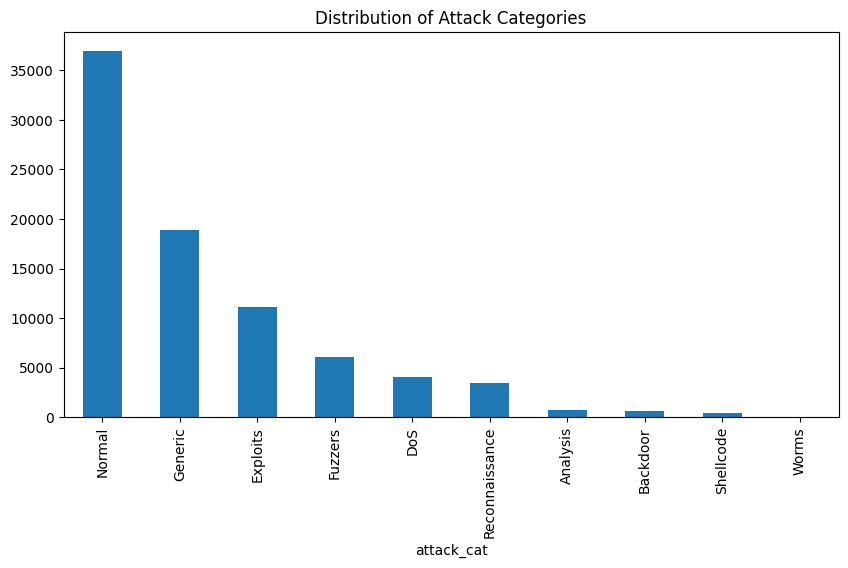

In [17]:
attack_cat_counts = train['attack_cat'].value_counts()
attack_cat_counts.plot(kind='bar', figsize=(10, 5), title='Distribution of Attack Categories')

Když se podíváme, z větší části jsou zde záznamy s normální síťové komunikace, což je v pořádku. Taky můžeme vidět, že asi worm útoků tam moc není. Můžeme se podívat.

In [18]:
worms = train[train.attack_cat == "Worms"]
worms.shape

(44, 44)

Nakonec zde nějaké útoky tohoto typu jsou a je jich přesně 44.

Můžeme se pro zajímavost podívat i na rozpoložení této kategorie v testovacích datech.

<Axes: title={'center': 'Distribution of Attack Categories'}, xlabel='attack_cat'>

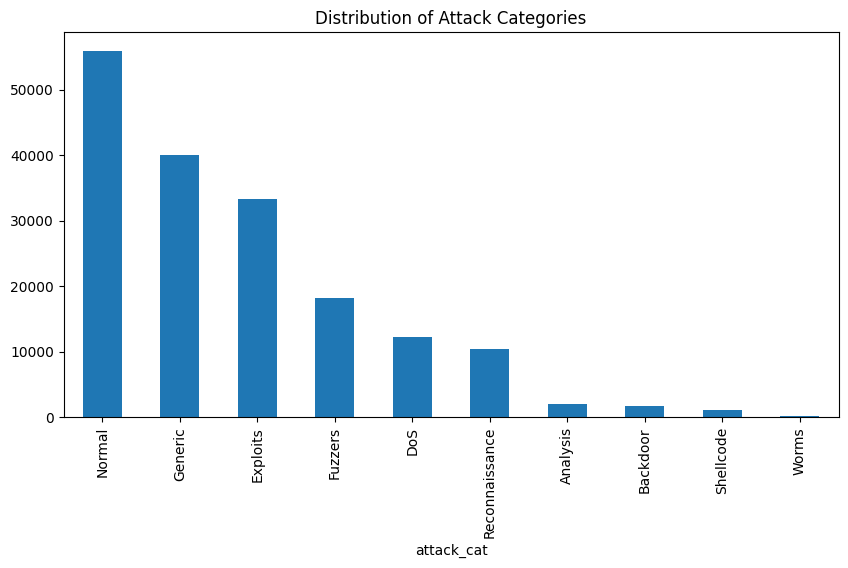

In [19]:
attack_cat_counts = test['attack_cat'].value_counts()
attack_cat_counts.plot(kind='bar', figsize=(10, 5), title='Distribution of Attack Categories')

V testovacích datech je poměr vůči normální komunikace a útokům o dost větší.

pojďme se podívat, jak data jsou na sobě závislá

<Axes: >

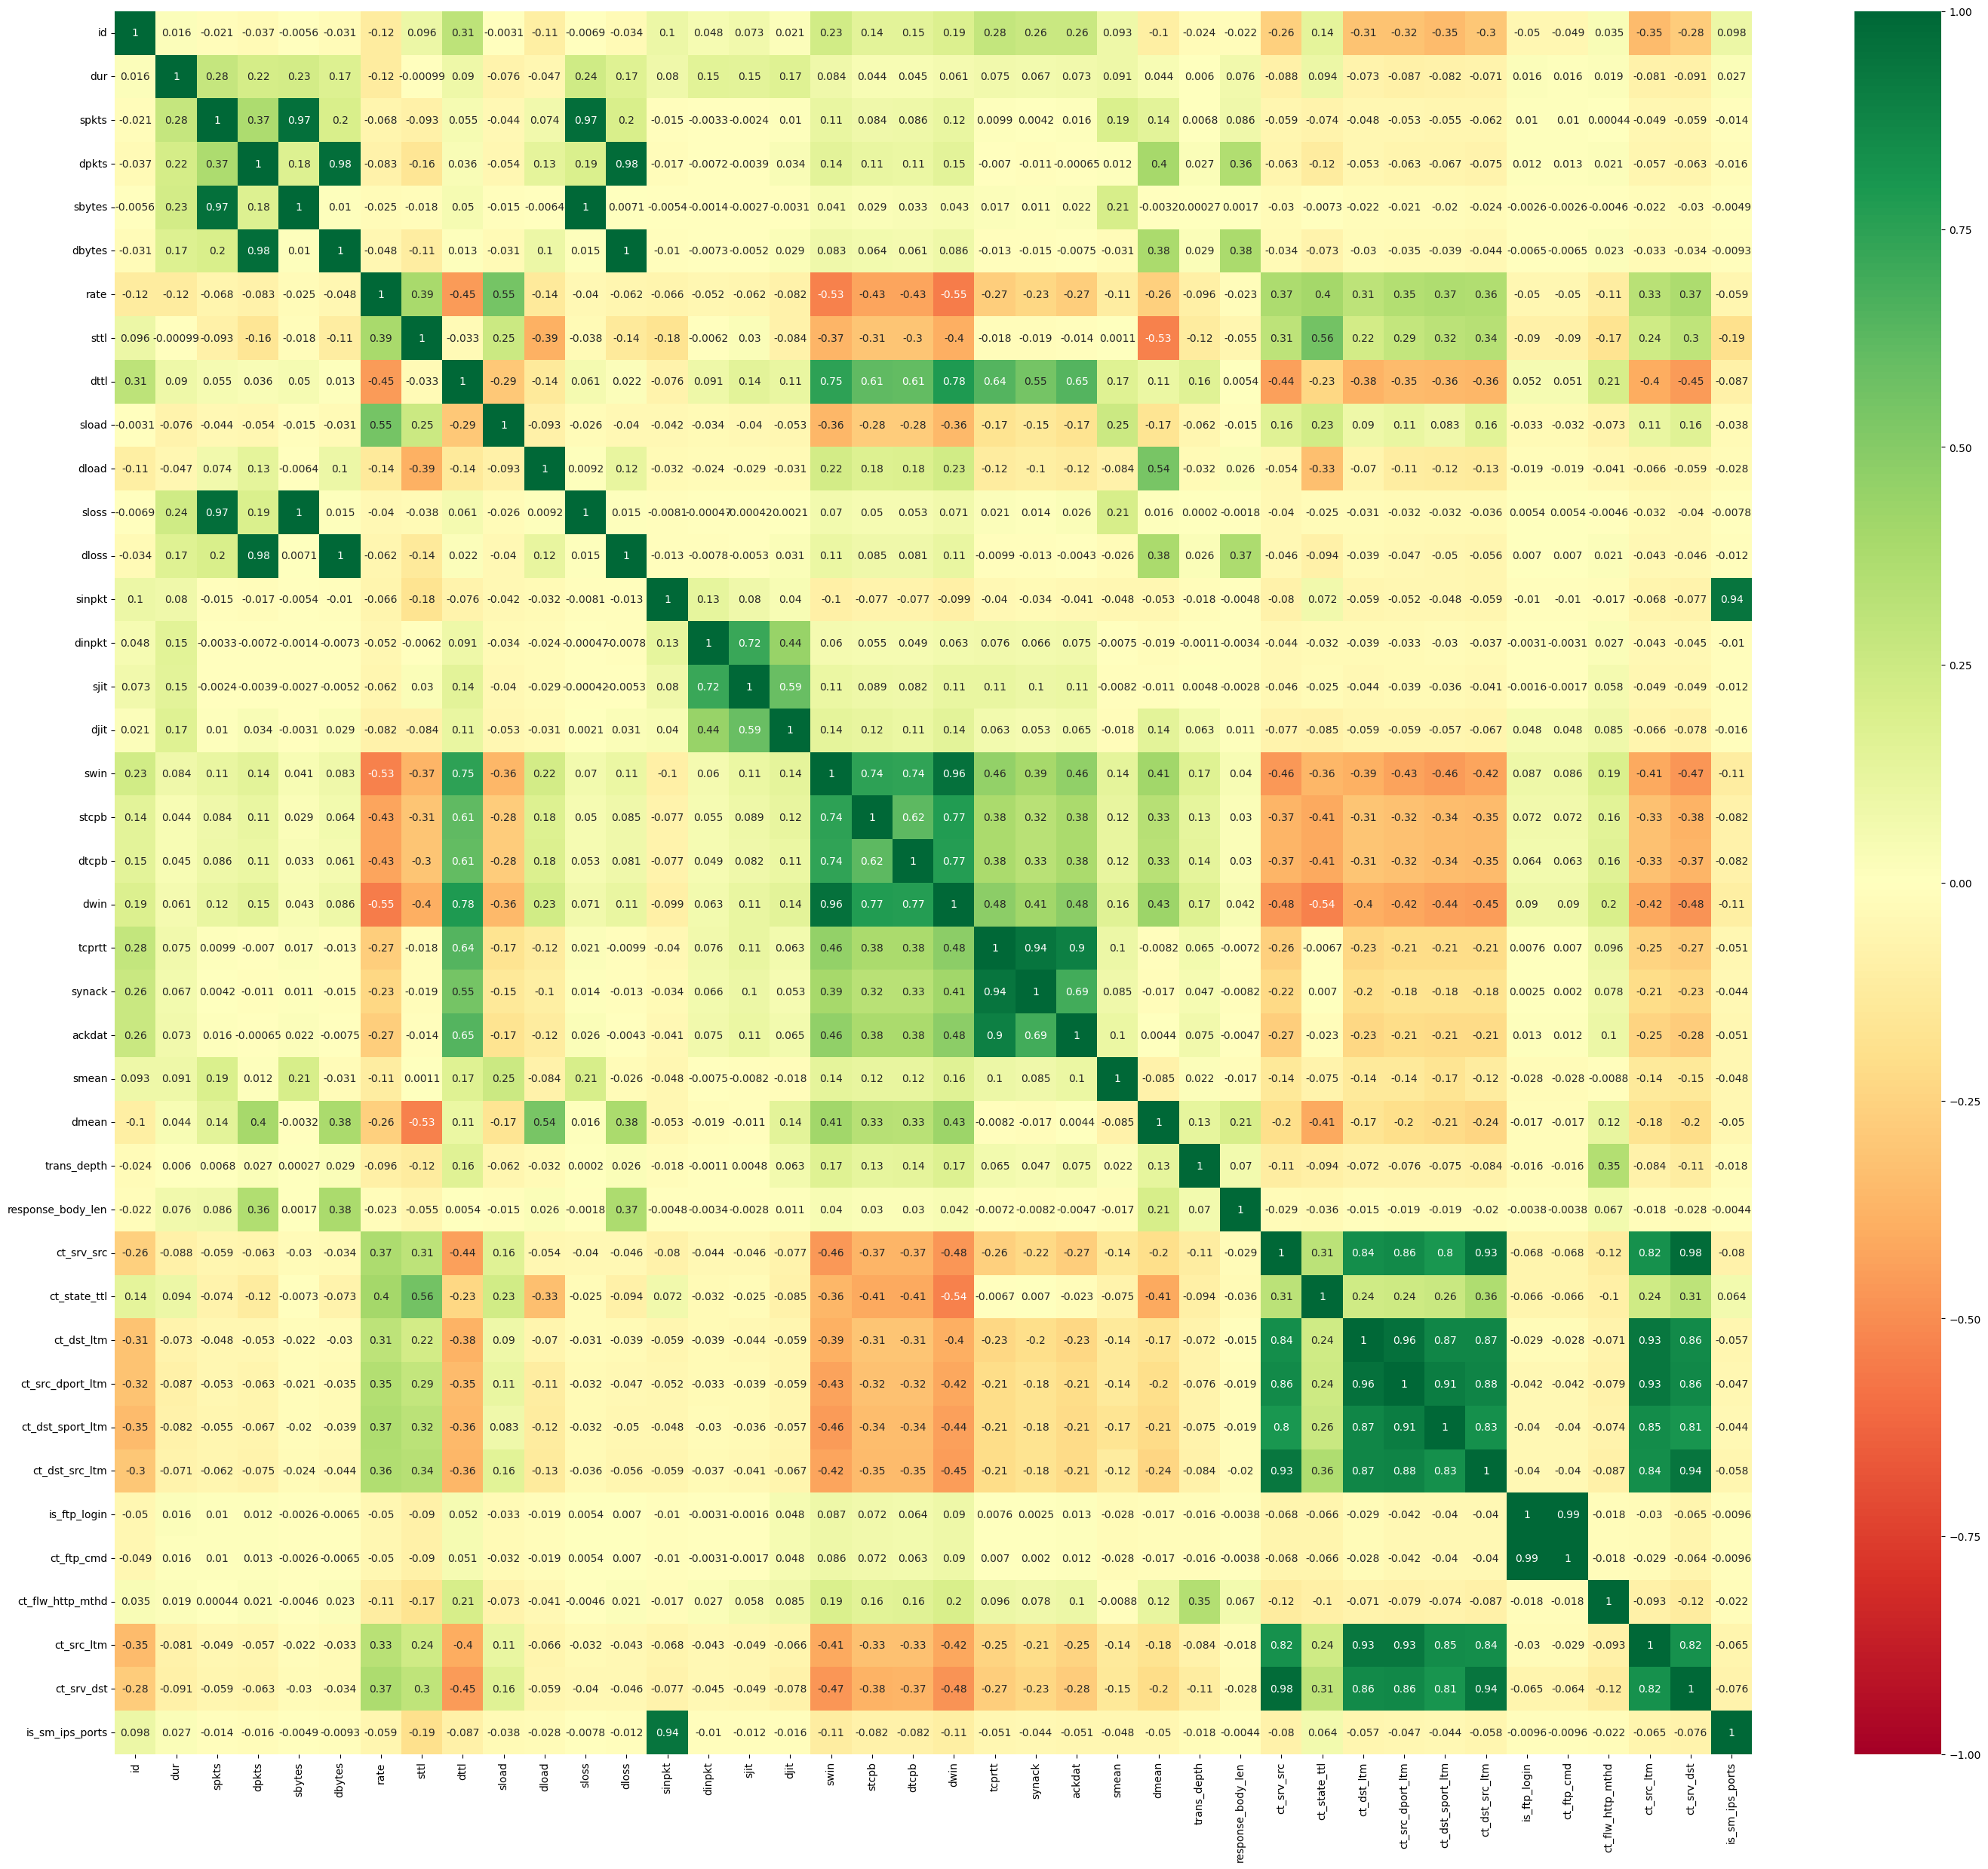

In [20]:
num_cols = train.select_dtypes(include=np.number).columns

correlation_matrix = train[num_cols].corr()
plt.figure(figsize=(35, 30))
sns.heatmap(correlation_matrix, cmap='RdYlGn', vmin=-1, vmax=1, annot=True)

Z kolerační matice můžeme vidět, že většina atributů spolu nijak nesouvisí, nebo jen velmi málo, ale pár atributů souvisí až moc.

- počet odeslaných paketů (spkts) a počet odeslaných bytů (sbytes) - 0.97
- nečekaně také počet přijatých pakterů (dpkts) a počet přijatých bytů (dbytes) - 0.98
- počet odeslaných paketů (spkts) a počet retransmitováných nebo ztracených bytů (sloss) - 0.97
- a opět to stejné u přijatých paketů (dpkts) a ztracených bytů (dloss) - 0.98
- další pak dttl s dalšími 7 atributy
- a poté dole v pravo dost "advanced" atributů, kterým popravdě nerozumím

překvapivě jsou zde i atributy, které maji úplnou koleraci:
- sbytes a sloss
- dbytes a dloss

Vyloženě tady nemáme moc vysoké nekolerace, jako mají kolerace. Největší je nekolerace je tady mezi rate a dwin (velikost tcp window ) a to -0.55
Další vysoké nekolerace jsou:
- rate a swin - -0.53
- překvapivě rate má dost nekolerací s dalšimi atributy
- swin, stcpb, dtcpb, dwin jich mají také dost


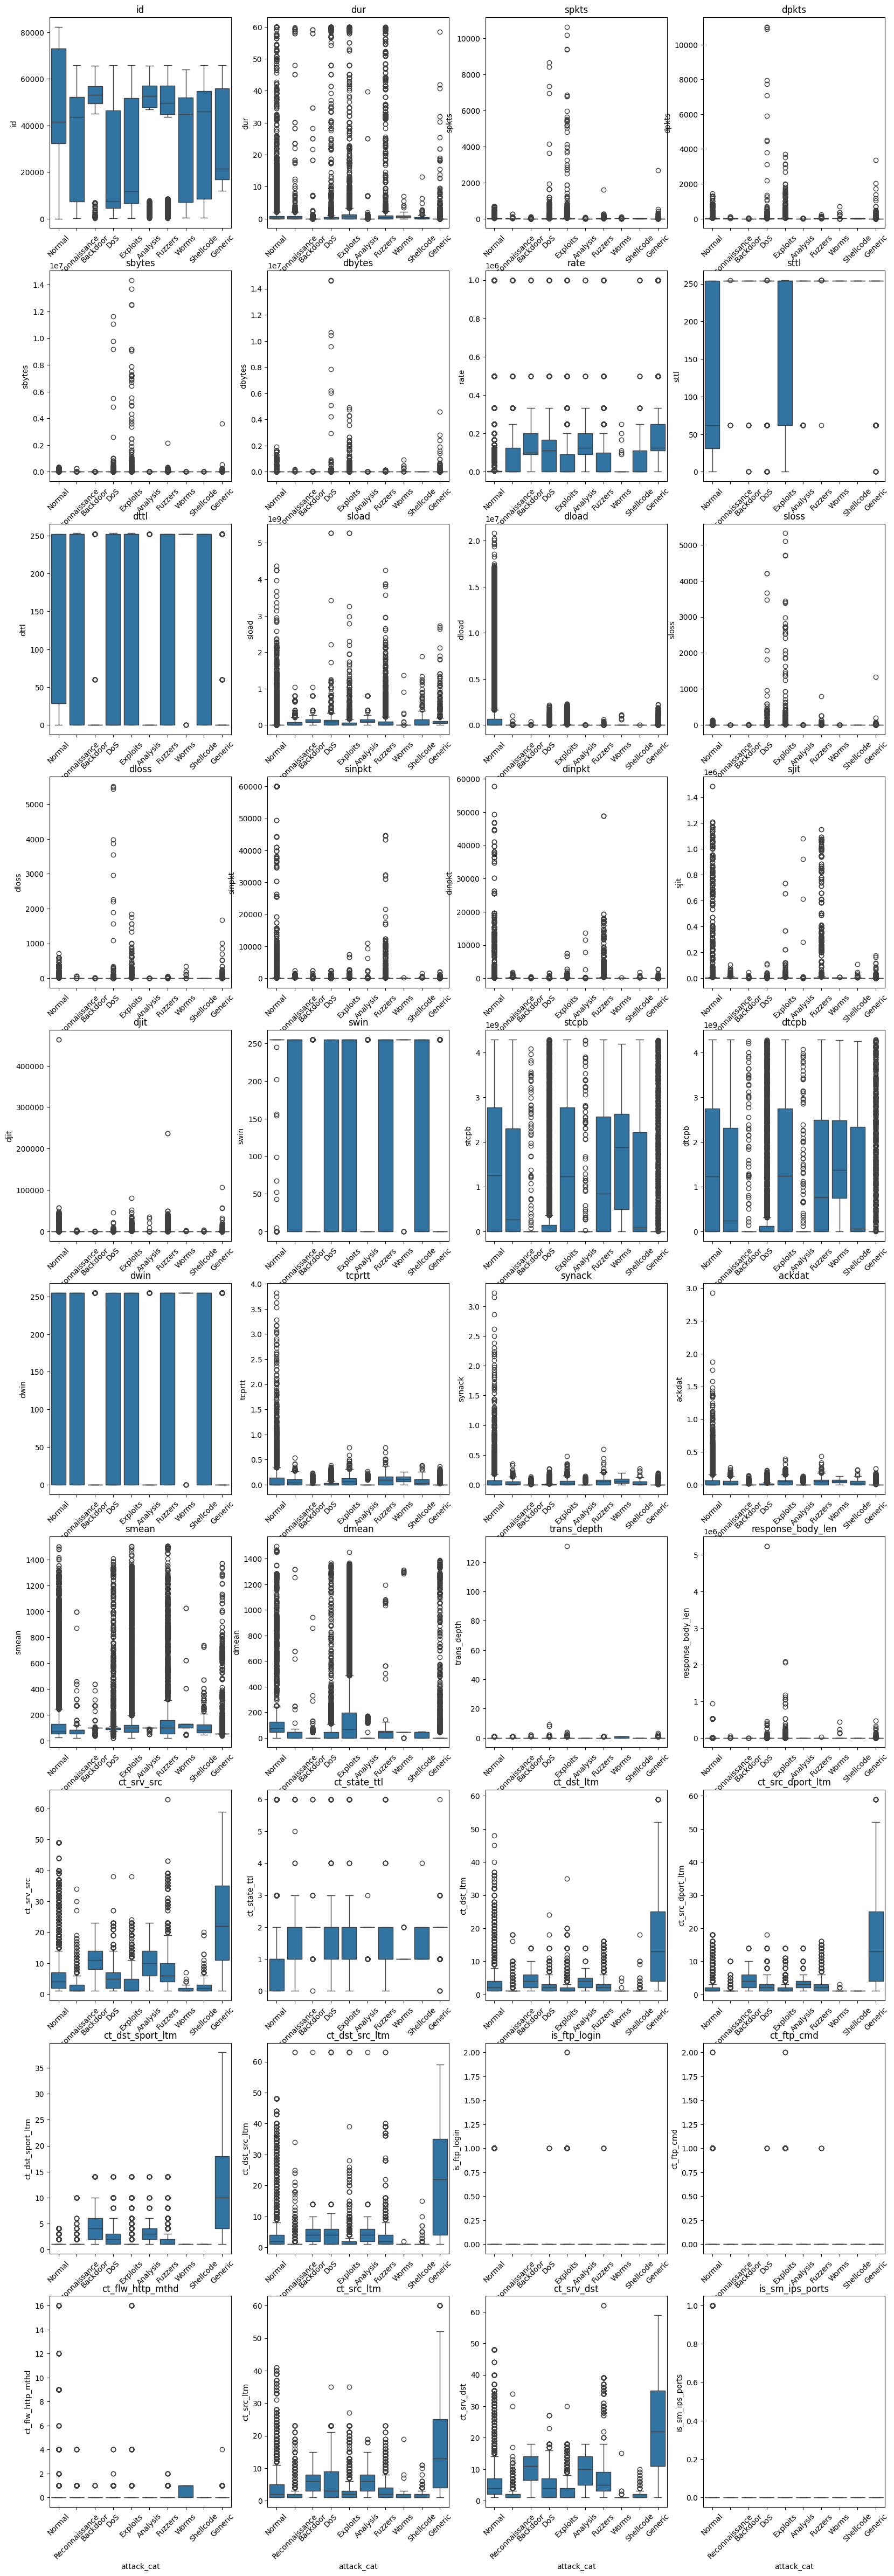

In [21]:
i = 0
in_row = 4
num_count = len(num_cols)

plt.figure(figsize=(20, 60))

for feature in num_cols:
    i = i + 1
    plt.subplot(math.ceil(num_count / in_row), in_row, i)
    sns.boxplot(x='attack_cat', y=feature, data=train)
    plt.title(feature)
    plt.xticks(rotation=45)

plt.show()

Když se podíváme, tak outlieři jsou všude. Teď dost záleží, co s nimi. Obecně u útoků, může být právě charakteristické dané chování, které se poté vyhodnotí, jakou outlieři. Například u DoS útoků typicky bude vysoký tok dat (dbytes/dpkts), což lze i vidět. Zatím na outliery šahat nebudu a pokud se bude model chovat špatně, tak se k nim vrátím.

U předzpracování se prvně podívám, jak jsou hodnoty rozloženy a podle toho se rozhodnu, který scaler použiju.

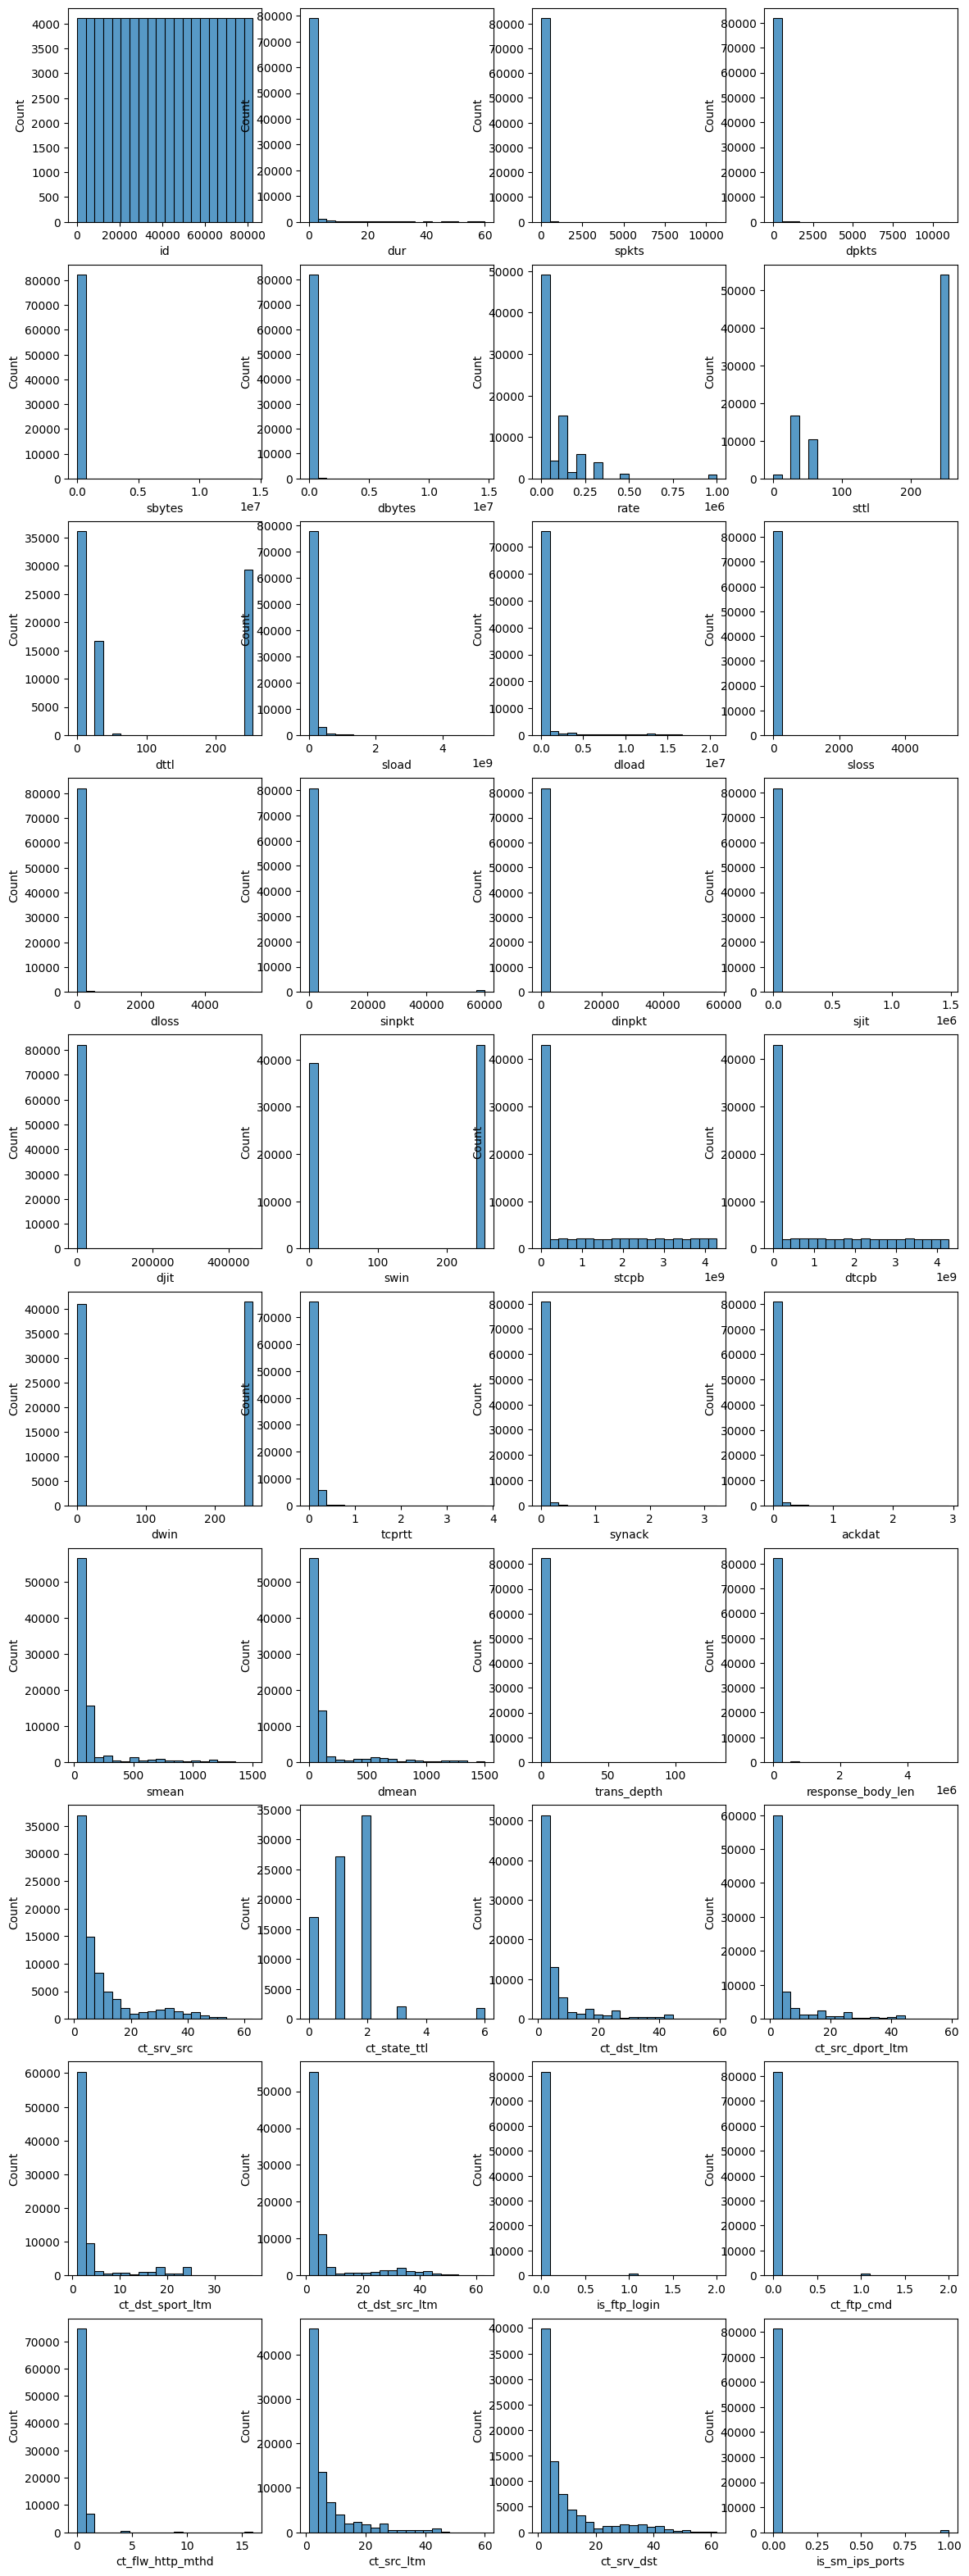

In [22]:
plt.figure(figsize=(14,40))

i = 0
for column in num_cols:
    i = i + 1
    plt.subplot(math.ceil(num_count / in_row), in_row, i)
    sns.histplot(train[column], bins=20)

plt.show()

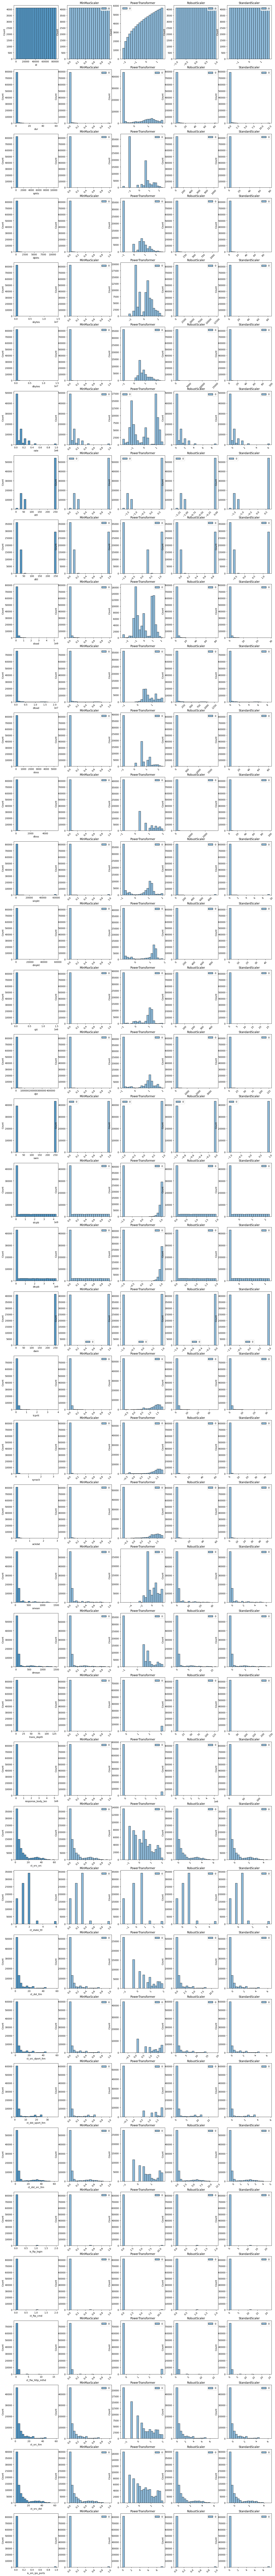

In [23]:
plt.figure(figsize=(20,200))

transformers = [MinMaxScaler(), PowerTransformer(), RobustScaler(), StandardScaler()]
names = ["MinMaxScaler", "PowerTransformer", "RobustScaler", "StandardScaler"]

plt_per_row = len(transformers) + 1

i = 0
for column in num_cols:
    i = i + 1
    #print normal
    plt.subplot(num_count, plt_per_row, i)
    sns.histplot(train[column], bins=20)
    for (idx, transformer) in enumerate(transformers):
        i = i + 1
        fited = transformer.fit_transform(train[[column]])
        plt.subplot(num_count, plt_per_row, i)
        plt.title(names[idx])
        plt.xticks(rotation=45)
        sns.histplot(fited, bins=20)

plt.show()

Tady jsem si udělal menší přehled toho, jak vypadají hodnoty po různých scalerech/transformerech. Jak vypadá, tak na všechny atributy použiju PowerTransformer, protože data nejsou úplně vyváženě rozdělena.

Před tím si ještě odebereme z atributů Id, protože to šklavat nebudeme

In [24]:
power_tranform = num_cols.delete(0)

Atributy na které budu používat **MinMax** scaler místo **PowerTransformeru** jsou: ct_src_ltm, ct_srv_dst a ct_srv_src

In [25]:
power_tranform = power_tranform.drop(labels=["ct_src_ltm", "ct_srv_dst", "ct_srv_src"])


In [26]:
power_tranform

Index(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl',
       'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit',
       'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean',
       'dmean', 'trans_depth', 'response_body_len', 'ct_state_ttl',
       'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'is_sm_ips_ports'],
      dtype='object')

In [27]:
minmax = ["ct_src_ltm", "ct_srv_dst", "ct_srv_src"]

#transform
powertransformer = PowerTransformer()
minmaxscaler = MinMaxScaler()

encoded_train = pd.DataFrame(index=train.index)
encoded_train[power_tranform] = powertransformer.fit_transform(train[power_tranform])
encoded_train[minmax] = minmaxscaler.fit_transform(train[minmax])

encoded_test = pd.DataFrame(index=test.index)
encoded_test[power_tranform] = powertransformer.fit_transform(test[power_tranform])
encoded_test[minmax] = minmaxscaler.fit_transform(test[minmax])

In [28]:
encoded_train.shape

(82332, 39)

In [29]:
train.shape

(82332, 44)

Tak nyní máme data naškálovaná, ještě musíme zaenkódovat kategorické atributy

In [30]:
str_cols = train.select_dtypes(exclude=np.number).columns
str_cols

Index(['proto', 'service', 'state', 'attack_cat'], dtype='object')

In [31]:
for col in str_cols:
    print(col, train[col].unique())

proto ['udp' 'arp' 'tcp' 'igmp' 'ospf' 'sctp' 'gre' 'ggp' 'ip' 'ipnip' 'st2'
 'argus' 'chaos' 'egp' 'emcon' 'nvp' 'pup' 'xnet' 'mux' 'dcn' 'hmp' 'prm'
 'trunk-1' 'trunk-2' 'xns-idp' 'leaf-1' 'leaf-2' 'irtp' 'rdp' 'netblt'
 'mfe-nsp' 'merit-inp' '3pc' 'idpr' 'ddp' 'idpr-cmtp' 'tp++' 'ipv6' 'sdrp'
 'ipv6-frag' 'ipv6-route' 'idrp' 'mhrp' 'i-nlsp' 'rvd' 'mobile' 'narp'
 'skip' 'tlsp' 'ipv6-no' 'any' 'ipv6-opts' 'cftp' 'sat-expak' 'ippc'
 'kryptolan' 'sat-mon' 'cpnx' 'wsn' 'pvp' 'br-sat-mon' 'sun-nd' 'wb-mon'
 'vmtp' 'ttp' 'vines' 'nsfnet-igp' 'dgp' 'eigrp' 'tcf' 'sprite-rpc' 'larp'
 'mtp' 'ax.25' 'ipip' 'aes-sp3-d' 'micp' 'encap' 'pri-enc' 'gmtp' 'ifmp'
 'pnni' 'qnx' 'scps' 'cbt' 'bbn-rcc' 'igp' 'bna' 'swipe' 'visa' 'ipcv'
 'cphb' 'iso-tp4' 'wb-expak' 'sep' 'secure-vmtp' 'xtp' 'il' 'rsvp' 'unas'
 'fc' 'iso-ip' 'etherip' 'pim' 'aris' 'a/n' 'ipcomp' 'snp' 'compaq-peer'
 'ipx-n-ip' 'pgm' 'vrrp' 'l2tp' 'zero' 'ddx' 'iatp' 'stp' 'srp' 'uti' 'sm'
 'smp' 'isis' 'ptp' 'fire' 'crtp' 'crudp' 'sccopm

Co se dívám, tak ktegorické hodnoty mají hodně různých hodnot, takže na service a state, které mají poměrně málo hodnot, použiju **OneHotEncoder** na attack_cat použiju **LabelEncoder**, z důvodu toho, že se jedná o kategorii útoku, kterou budeme predikovat a na proto tedy **OrdinalEncoder**. Sice není nejlepší, protože data nejsou nijak seřazená a model je bude brát jako že vyšší hodnota je lepší, ale uvidíme podle přesnosti.

In [32]:
onehot = ["service", "state"]

encoded_train = encoded_train.join(pd.get_dummies(train[onehot]))
encoded_test = encoded_test.join(pd.get_dummies(test[onehot]))

Během trénování modelů jsem zjístil, že některé data jsou v test datasetup, ale v train ne, tedy OneHot dělá problém, proto tady syncuju sloupce, tak aby byly stejné, tedy v test datasetu budou sloupce, které nejsou v train, ale budou tam s hodnotou 0.

In [33]:
train_columns = encoded_train.columns

encoded_test = encoded_test.reindex(columns=train_columns, fill_value=0)

In [34]:
ordinal = OrdinalEncoder()
encoded_train["proto"] = ordinal.fit_transform(train[["proto"]])
encoded_test["proto"] = ordinal.fit_transform(test[["proto"]])

label = LabelEncoder()
encoded_train["attack_cat"] = label.fit_transform(train["attack_cat"])
encoded_test["attack_cat"] = label.fit_transform(test["attack_cat"])

In [35]:
encoded_train

dur     spkts     dpkts    sbytes    dbytes      rate      sttl  \
0     -0.842305 -0.979902 -1.048670  0.135652 -1.074349  0.948125  0.719470   
1     -0.842321 -0.979902 -1.048670  0.897823 -1.074349  1.027641  0.719470   
2     -0.842337 -0.979902 -1.048670  0.626319 -1.074349  1.145338  0.719470   
3     -0.842332 -0.979902 -1.048670  0.525115 -1.074349  1.099633  0.719470   
4     -0.842310 -0.979902 -1.048670  0.990892 -1.074349  0.971904  0.719470   
...         ...       ...       ...       ...       ...       ...       ...   
82327 -0.842337 -0.979902 -1.048670 -1.218974 -1.074349  1.145338  0.719470   
82328  1.323496  1.085591  0.678073  1.784263  0.563428 -1.032778  0.719470   
82329 -0.842364 -1.705051 -1.048670 -2.166619 -1.074349 -1.783861 -1.780022   
82330 -0.842364 -1.705051 -1.048670 -2.166619 -1.074349 -1.783861 -1.780022   
82331 -0.842316 -0.979902 -1.048670 -1.218974 -1.074349  0.998210  0.719470   

           dttl     sload     dload  ...  service_ssl  state_ACC  state_CLO  \
0     -1.077386  1.240160 -1.069247  ...        False      False      False   
1     -1.077386  1.667212 -1.069247  ...        False      False      False   
2     -1.077386  1.658756 -1.069247  ...        False      False      False   
3     -1.077386  1.561839 -1.069247  ...        False      False      False   
4     -1.077386  1.657462 -1.069247  ...        False      False      False   
...         ...       ...       ...  ...          ...        ...        ...   
82327 -1.077386  1.039379 -1.069247  ...        False      False      False   
82328  1.152736 -0.470634  0.413147  ...        False      False      False   
82329 -1.077386 -2.526190 -1.069247  ...        False      False      False   
82330 -1.077386 -2.526190 -1.069247  ...        False      False      False   
82331 -1.077386  0.890056 -1.069247  ...        False      False      False   

       state_CON  state_FIN  state_INT  state_REQ  state_RST  proto  \
0          False      False       True      False      False  117.0   
1          False      False       True      False      False  117.0   
2          False      False       True      False      False  117.0   
3          False      False       True      False      False  117.0   
4          False      False       True      False      False  117.0   
...          ...        ...        ...        ...        ...    ...   
82327      False      False       True      False      False  117.0   
82328      False       True      False      False      False  111.0   
82329      False      False       True      False      False    6.0   
82330      False      False       True      False      False    6.0   
82331      False      False       True      False      False  117.0   

       attack_cat  
0               6  
1               6  
2               6  
3               6  
4               6  
...           ...  
82327           6  
82328           6  
82329           6  
82330           6  
82331           6  

[82332 rows x 61 columns]

Tak data máme zaenkódovaná. Můžeme se podívat, kterou metriku zvolit.

Osobně bych zvolil f1 score. S ním jsem zeznámen ze cvičení a také náš dataset není dost vyvážený, například tam je více Normal trafficu. Dále je více komplexnéjší, protože zahrnuje i precision a recall.

Rozdělení dat

In [36]:
X_train = encoded_train.drop(columns=["attack_cat"])
y_train = encoded_train["attack_cat"]

X_test = encoded_test.drop(columns=["attack_cat"])
y_test = encoded_test["attack_cat"]

In [37]:
X_train.shape

(82332, 60)

In [38]:
y_train.shape

(82332,)

In [39]:
X_test.shape

(175341, 60)

In [40]:
y_test.shape

(175341,)

Trénování modelu

vypnutí warningů

In [41]:
import warnings

warnings.filterwarnings("ignore")

In [42]:
tree_classifier = DecisionTreeClassifier(random_state=13)
tree_classifier.fit(X_train, y_train)

y_pred = tree_classifier.predict(X_test)

print(f"F1 score: {f1_score(y_test, y_pred, average="weighted")}")
print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")

F1 score: 0.6545466279897858
Accuracy score: 0.6800976383161953


Jak můžeme vidět, decision tree má 65% F1 score, tedy není to úplně nejlepšé, ale jsme nad 50%.

In [43]:
random_classifier = RandomForestClassifier(random_state=13)
random_classifier.fit(X_train, y_train)

y_pred = random_classifier.predict(X_test)

print(f"F1 score: {f1_score(y_test, y_pred, average="weighted")}")
print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")

F1 score: 0.6702367550720327
Accuracy score: 0.7219075971963204


RandomForest je trochu lepší, zen už má 67% F1 score.

In [44]:
perceptron_classifier = MLPClassifier(random_state=13)
perceptron_classifier.fit(X_train, y_train)

y_pred = perceptron_classifier.predict(X_test)

print(f"F1 score: {f1_score(y_test, y_pred, average="weighted")}")
print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")

F1 score: 0.7032893677199172
Accuracy score: 0.733530663107887


A Multi-Layer-Perceptron je zatím nejlepší s 70% F1 score.

Nyní teda půjdeme na K-Fold validaci. Využiju Stratified verzi, která je lepší, pro nevyvážený dataset, jako je tento.

In [45]:
algs = {
    "Decision Tree": DecisionTreeClassifier(random_state=13),
    "Random Forest": RandomForestClassifier(random_state=13),
    "MLP": MLPClassifier(random_state=13)
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=13)

def do_alg(alg):
    scores = cross_val_score(alg, X_train, y_train, cv=skf, scoring="f1_weighted")

    return {
        "f1": f"{round(scores.mean(), 3) * 100}%",
        "std": scores.std(),
        "all": scores
    }

results = pd.DataFrame(dict(list(map(lambda data: [data[0], do_alg(data[1])], algs.items()))))
results


Decision Tree  \
f1                                               85.2%   
std                                           0.000987   
all  [0.8501232728632853, 0.8528026293907129, 0.850...   

                                         Random Forest  \
f1                                               86.7%   
std                                           0.001467   
all  [0.8647673506531894, 0.8681531001265081, 0.865...   

                                                   MLP  
f1                                               85.8%  
std                                           0.008207  
all  [0.858506212655321, 0.8629697475325863, 0.8419...

Jak můžeme vidět, nejlepší je tady **Random Forest**

Můžeme zkusit potunit klidně i Decision Tree a MLP a uvidíme, jak to dopadne.

In [46]:
pd.set_option('display.max_colwidth', None)

In [47]:
def get_results(grid):
    def stringify_params(params):
        return ', '.join([f"{key}: {value}" for key, value in params.items()])

    f1score = grid.cv_results_["mean_test_score"]
    params = grid.cv_results_["params"]

    result = []

    for idx, f1 in enumerate(f1score):
        result.append({
            "F1 Score": round(f1 * 100, 4),
            "Paramtery": stringify_params(params[idx])
        })

    return pd.DataFrame(result)

DecisionTree

In [48]:
DecisionTreeGrid = GridSearchCV(
    DecisionTreeClassifier(random_state=13),
    {
        "max_depth": [None, 5, 10, 15, 20],
        "min_samples_split": [2, 5, 10, 15, 20],
        "min_samples_leaf": [1, 2, 4, 8, 16]
    },
    cv=5,
    scoring="f1_weighted",
    n_jobs=-1
)

DecisionTreeGrid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=13), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4, 8, 16],
                         'min_samples_split': [2, 5, 10, 15, 20]},
             scoring='f1_weighted')

In [49]:
DecisionTreeResult = get_results(DecisionTreeGrid)
DecisionTreeResult.sort_values(by="F1 Score", ascending=False)

F1 Score                                                  Paramtery
82   82.1039  max_depth: 15, min_samples_leaf: 2, min_samples_split: 10
75   82.0739   max_depth: 15, min_samples_leaf: 1, min_samples_split: 2
80   82.0707   max_depth: 15, min_samples_leaf: 2, min_samples_split: 2
76   82.0575   max_depth: 15, min_samples_leaf: 1, min_samples_split: 5
77   82.0151  max_depth: 15, min_samples_leaf: 1, min_samples_split: 10
..       ...                                                        ...
48   73.9230  max_depth: 5, min_samples_leaf: 16, min_samples_split: 15
49   73.9230  max_depth: 5, min_samples_leaf: 16, min_samples_split: 20
47   73.9230  max_depth: 5, min_samples_leaf: 16, min_samples_split: 10
46   73.9230   max_depth: 5, min_samples_leaf: 16, min_samples_split: 5
45   73.9230   max_depth: 5, min_samples_leaf: 16, min_samples_split: 2

[125 rows x 2 columns]

In [50]:
DecisionTreeResult.max()

F1 Score                                                        82.1039
Paramtery    max_depth: None, min_samples_leaf: 8, min_samples_split: 5
dtype: object

Tady můžeme vidět, že natunovaný **DecisionTree** má nejlepší F1 score: **82.1%**

MLP

In [52]:
MLPGrid = GridSearchCV(
    MLPClassifier(random_state=13),
    {
        "hidden_layer_sizes": [(100,), (50, 50), (100, 100), (50, 50, 50)],
        "activation": ["tanh", "relu"],
        "max_iter": [10, 100, 500, 1000],
        'learning_rate': ['constant','adaptive']
    },
    cv=5,
    scoring="f1_weighted",
    n_jobs=-1
)

MLPGrid.fit(X_train, y_train)

/home/patrick115/Projects/VSB/ZSU/env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/patrick115/Projects/VSB/ZSU/env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/patrick115/Projects/VSB/ZSU/env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/patrick115/Projects/VSB/ZSU/env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged ye

GridSearchCV(cv=5, estimator=MLPClassifier(random_state=13), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'hidden_layer_sizes': [(100,), (50, 50), (100, 100),
                                                (50, 50, 50)],
                         'learning_rate': ['constant', 'adaptive'],
                         'max_iter': [10, 100, 500, 1000]},
             scoring='f1_weighted')

In [54]:
MLPData = get_results(MLPGrid)
MLPData.sort_values(by="F1 Score", ascending=False)

F1 Score  \
43   83.4650   
42   83.4650   
46   83.4650   
47   83.4650   
23   83.4086   
..       ...   
40   79.6096   
52   79.3610   
48   79.3610   
32   78.1205   
36   78.1205   

                                                                                    Paramtery  
43    activation: relu, hidden_layer_sizes: (50, 50), learning_rate: constant, max_iter: 1000  
42     activation: relu, hidden_layer_sizes: (50, 50), learning_rate: constant, max_iter: 500  
46     activation: relu, hidden_layer_sizes: (50, 50), learning_rate: adaptive, max_iter: 500  
47    activation: relu, hidden_layer_sizes: (50, 50), learning_rate: adaptive, max_iter: 1000  
23  activation: tanh, hidden_layer_sizes: (100, 100), learning_rate: adaptive, max_iter: 1000  
..                                                                                        ...  
40      activation: relu, hidden_layer_sizes: (50, 50), learning_rate: constant, max_iter: 10  
52    activation: relu, hidden_layer_sizes: (100, 100), learning_rate: adaptive, max_iter: 10  
48    activation: relu, hidden_layer_sizes: (100, 100), learning_rate: constant, max_iter: 10  
32        activation: relu, hidden_layer_sizes: (100,), learning_rate: constant, max_iter: 10  
36        activation: relu, hidden_layer_sizes: (100,), learning_rate: adaptive, max_iter: 10  

[64 rows x 2 columns]

In [55]:
MLPData.max()

F1 Score                                                                                         83.465
Paramtery    activation: tanh, hidden_layer_sizes: (50, 50, 50), learning_rate: constant, max_iter: 500
dtype: object

Tady můžeme vidět, že natunovaný **MLP** má nejlepší F1 score: **83.5%**

A teď se pojďme podívat na náš **Random Forest**

In [56]:
RandomForestGrid = GridSearchCV(
    RandomForestClassifier(random_state=13),
    {
        "n_estimators": [50, 100, 150, 200, 250],
        "max_depth": [None, 5, 10, 15, 20],
        "min_samples_split": [2, 5, 10, 15, 20],
        "min_samples_leaf": [1, 2, 4, 8, 16]
    },
    cv=5,
    scoring="f1_weighted",
    n_jobs=-1
)

RandomForestGrid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=13), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4, 8, 16],
                         'min_samples_split': [2, 5, 10, 15, 20],
                         'n_estimators': [50, 100, 150, 200, 250]},
             scoring='f1_weighted')

In [57]:
RandomForestData = get_results(RandomForestGrid)
RandomForestData.sort_values(by="F1 Score", ascending=False)

F1 Score  \
2     83.1188   
1     83.0913   
4     83.0723   
3     83.0631   
0     83.0310   
..        ...   
214   72.1978   
219   72.1978   
204   72.1978   
174   72.1941   
169   72.1918   

                                                                         Paramtery  
2    max_depth: None, min_samples_leaf: 1, min_samples_split: 2, n_estimators: 150  
1    max_depth: None, min_samples_leaf: 1, min_samples_split: 2, n_estimators: 100  
4    max_depth: None, min_samples_leaf: 1, min_samples_split: 2, n_estimators: 250  
3    max_depth: None, min_samples_leaf: 1, min_samples_split: 2, n_estimators: 200  
0     max_depth: None, min_samples_leaf: 1, min_samples_split: 2, n_estimators: 50  
..                                                                             ...  
214    max_depth: 5, min_samples_leaf: 8, min_samples_split: 10, n_estimators: 250  
219    max_depth: 5, min_samples_leaf: 8, min_samples_split: 15, n_estimators: 250  
204     max_depth: 5, min_samples_leaf: 8, min_samples_split: 2, n_estimators: 250  
174    max_depth: 5, min_samples_leaf: 2, min_samples_split: 20, n_estimators: 250  
169    max_depth: 5, min_samples_leaf: 2, min_samples_split: 15, n_estimators: 250  

[625 rows x 2 columns]

In [58]:
RandomForestData.max()

F1 Score                                                                          83.1188
Paramtery    max_depth: None, min_samples_leaf: 8, min_samples_split: 5, n_estimators: 50
dtype: object

Jak můžeme vidět náš **Random Forest** má nejlepší F1 score: **83.11%** 

In [59]:
83.465 - 83.1188

0.3462000000000103

Překvapivě jsem si myslel, že nakonec **Random Forest** výjde s nejlepší přesností, ale **MLP** je lepší o 0.3462% F1 score.
Určitě, kdybych dále tunoval parametry bychom se mohli dostat k lepším výsledkům. Taky kdyby se provedla lepší selekce atributů, zahodili by se ty nepotřebné, ale z důvodu, že dost atributů mi jako člověku, co se síťovému provodu nevěnuje nedává smysl, tak jsem je nechával.

Pojďme si udělat kompletní tabulku, se všemi výsledky algoritmů a jejich paramery a F1 score.

In [63]:
MDText = "| Algoritmus | Parametry | F1 Score |\n| --- | --- | --- |\n"

for idx, row in DecisionTreeResult.sort_values(by="F1 Score", ascending=False).iterrows():
    MDText += f"| Decision Tree | {row['Paramtery']} | {row['F1 Score']} |\n"

for idx, row in MLPData.sort_values(by="F1 Score", ascending=False).iterrows():
    MDText += f"| MLP | {row['Paramtery']} | {row['F1 Score']} |\n"

for idx, row in RandomForestData.sort_values(by="F1 Score", ascending=False).iterrows():
    MDText += f"| Random Forest | {row['Paramtery']} | {row['F1 Score']} |\n"

print(MDText)

| Algoritmus | Parametry | F1 Score |
| --- | --- | --- |
| Decision Tree | max_depth: 15, min_samples_leaf: 2, min_samples_split: 10 | 82.1039 |
| Decision Tree | max_depth: 15, min_samples_leaf: 1, min_samples_split: 2 | 82.0739 |
| Decision Tree | max_depth: 15, min_samples_leaf: 2, min_samples_split: 2 | 82.0707 |
| Decision Tree | max_depth: 15, min_samples_leaf: 1, min_samples_split: 5 | 82.0575 |
| Decision Tree | max_depth: 15, min_samples_leaf: 1, min_samples_split: 10 | 82.0151 |
| Decision Tree | max_depth: 15, min_samples_leaf: 2, min_samples_split: 5 | 82.0122 |
| Decision Tree | max_depth: 15, min_samples_leaf: 8, min_samples_split: 20 | 81.9893 |
| Decision Tree | max_depth: 15, min_samples_leaf: 4, min_samples_split: 10 | 81.9723 |
| Decision Tree | max_depth: 15, min_samples_leaf: 2, min_samples_split: 15 | 81.9678 |
| Decision Tree | max_depth: 15, min_samples_leaf: 4, min_samples_split: 5 | 81.9552 |
| Decision Tree | max_depth: 15, min_samples_leaf: 4, min_samples_s

| Algoritmus | Parametry | F1 Score |
| --- | --- | --- |
| Decision Tree | max_depth: 15, min_samples_leaf: 2, min_samples_split: 10 | 82.1039 |
| Decision Tree | max_depth: 15, min_samples_leaf: 1, min_samples_split: 2 | 82.0739 |
| Decision Tree | max_depth: 15, min_samples_leaf: 2, min_samples_split: 2 | 82.0707 |
| Decision Tree | max_depth: 15, min_samples_leaf: 1, min_samples_split: 5 | 82.0575 |
| Decision Tree | max_depth: 15, min_samples_leaf: 1, min_samples_split: 10 | 82.0151 |
| Decision Tree | max_depth: 15, min_samples_leaf: 2, min_samples_split: 5 | 82.0122 |
| Decision Tree | max_depth: 15, min_samples_leaf: 8, min_samples_split: 20 | 81.9893 |
| Decision Tree | max_depth: 15, min_samples_leaf: 4, min_samples_split: 10 | 81.9723 |
| Decision Tree | max_depth: 15, min_samples_leaf: 2, min_samples_split: 15 | 81.9678 |
| Decision Tree | max_depth: 15, min_samples_leaf: 4, min_samples_split: 5 | 81.9552 |
| Decision Tree | max_depth: 15, min_samples_leaf: 4, min_samples_split: 2 | 81.9552 |
| Decision Tree | max_depth: 15, min_samples_leaf: 1, min_samples_split: 15 | 81.9267 |
| Decision Tree | max_depth: 15, min_samples_leaf: 1, min_samples_split: 20 | 81.9173 |
| Decision Tree | max_depth: 15, min_samples_leaf: 8, min_samples_split: 10 | 81.898 |
| Decision Tree | max_depth: 15, min_samples_leaf: 8, min_samples_split: 5 | 81.898 |
| Decision Tree | max_depth: 15, min_samples_leaf: 8, min_samples_split: 2 | 81.898 |
| Decision Tree | max_depth: 15, min_samples_leaf: 8, min_samples_split: 15 | 81.898 |
| Decision Tree | max_depth: 15, min_samples_leaf: 2, min_samples_split: 20 | 81.8899 |
| Decision Tree | max_depth: 15, min_samples_leaf: 4, min_samples_split: 20 | 81.889 |
| Decision Tree | max_depth: 15, min_samples_leaf: 16, min_samples_split: 20 | 81.8884 |
| Decision Tree | max_depth: 15, min_samples_leaf: 16, min_samples_split: 5 | 81.8884 |
| Decision Tree | max_depth: 15, min_samples_leaf: 16, min_samples_split: 10 | 81.8884 |
| Decision Tree | max_depth: 15, min_samples_leaf: 16, min_samples_split: 15 | 81.8884 |
| Decision Tree | max_depth: 15, min_samples_leaf: 16, min_samples_split: 2 | 81.8884 |
| Decision Tree | max_depth: 15, min_samples_leaf: 4, min_samples_split: 15 | 81.8662 |
| Decision Tree | max_depth: 20, min_samples_leaf: 16, min_samples_split: 20 | 81.6538 |
| Decision Tree | max_depth: 20, min_samples_leaf: 16, min_samples_split: 15 | 81.6538 |
| Decision Tree | max_depth: 20, min_samples_leaf: 16, min_samples_split: 5 | 81.6538 |
| Decision Tree | max_depth: 20, min_samples_leaf: 16, min_samples_split: 2 | 81.6538 |
| Decision Tree | max_depth: 20, min_samples_leaf: 16, min_samples_split: 10 | 81.6538 |
| Decision Tree | max_depth: None, min_samples_leaf: 16, min_samples_split: 10 | 81.621 |
| Decision Tree | max_depth: None, min_samples_leaf: 16, min_samples_split: 5 | 81.621 |
| Decision Tree | max_depth: None, min_samples_leaf: 16, min_samples_split: 20 | 81.621 |
| Decision Tree | max_depth: None, min_samples_leaf: 16, min_samples_split: 15 | 81.621 |
| Decision Tree | max_depth: None, min_samples_leaf: 16, min_samples_split: 2 | 81.621 |
| Decision Tree | max_depth: 20, min_samples_leaf: 8, min_samples_split: 20 | 81.5865 |
| Decision Tree | max_depth: 20, min_samples_leaf: 1, min_samples_split: 10 | 81.4824 |
| Decision Tree | max_depth: None, min_samples_leaf: 8, min_samples_split: 20 | 81.4683 |
| Decision Tree | max_depth: 20, min_samples_leaf: 1, min_samples_split: 20 | 81.4614 |
| Decision Tree | max_depth: 20, min_samples_leaf: 1, min_samples_split: 2 | 81.4459 |
| Decision Tree | max_depth: 20, min_samples_leaf: 8, min_samples_split: 10 | 81.4439 |
| Decision Tree | max_depth: 20, min_samples_leaf: 8, min_samples_split: 15 | 81.4439 |
| Decision Tree | max_depth: 20, min_samples_leaf: 8, min_samples_split: 2 | 81.4439 |
| Decision Tree | max_depth: 20, min_samples_leaf: 8, min_samples_split: 5 | 81.4439 |
| Decision Tree | max_depth: 10, min_samples_leaf: 2, min_samples_split: 5 | 81.4347 |
| Decision Tree | max_depth: 20, min_samples_leaf: 4, min_samples_split: 20 | 81.3926 |
| Decision Tree | max_depth: 10, min_samples_leaf: 1, min_samples_split: 5 | 81.3846 |
| Decision Tree | max_depth: 20, min_samples_leaf: 2, min_samples_split: 10 | 81.3763 |
| Decision Tree | max_depth: 10, min_samples_leaf: 2, min_samples_split: 10 | 81.3759 |
| Decision Tree | max_depth: 20, min_samples_leaf: 4, min_samples_split: 15 | 81.3587 |
| Decision Tree | max_depth: 10, min_samples_leaf: 2, min_samples_split: 2 | 81.352 |
| Decision Tree | max_depth: 10, min_samples_leaf: 1, min_samples_split: 2 | 81.3513 |
| Decision Tree | max_depth: 20, min_samples_leaf: 1, min_samples_split: 15 | 81.3505 |
| Decision Tree | max_depth: 20, min_samples_leaf: 2, min_samples_split: 20 | 81.3383 |
| Decision Tree | max_depth: 10, min_samples_leaf: 1, min_samples_split: 10 | 81.3373 |
| Decision Tree | max_depth: 10, min_samples_leaf: 2, min_samples_split: 15 | 81.3363 |
| Decision Tree | max_depth: 20, min_samples_leaf: 1, min_samples_split: 5 | 81.328 |
| Decision Tree | max_depth: 10, min_samples_leaf: 2, min_samples_split: 20 | 81.3277 |
| Decision Tree | max_depth: 10, min_samples_leaf: 4, min_samples_split: 2 | 81.3119 |
| Decision Tree | max_depth: 10, min_samples_leaf: 4, min_samples_split: 5 | 81.3119 |
| Decision Tree | max_depth: 10, min_samples_leaf: 1, min_samples_split: 15 | 81.3116 |
| Decision Tree | max_depth: 10, min_samples_leaf: 1, min_samples_split: 20 | 81.3105 |
| Decision Tree | max_depth: 10, min_samples_leaf: 4, min_samples_split: 10 | 81.3105 |
| Decision Tree | max_depth: 10, min_samples_leaf: 16, min_samples_split: 15 | 81.2993 |
| Decision Tree | max_depth: 10, min_samples_leaf: 16, min_samples_split: 20 | 81.2993 |
| Decision Tree | max_depth: 10, min_samples_leaf: 16, min_samples_split: 5 | 81.2993 |
| Decision Tree | max_depth: 10, min_samples_leaf: 16, min_samples_split: 2 | 81.2993 |
| Decision Tree | max_depth: 10, min_samples_leaf: 16, min_samples_split: 10 | 81.2993 |
| Decision Tree | max_depth: 10, min_samples_leaf: 8, min_samples_split: 20 | 81.2985 |
| Decision Tree | max_depth: 10, min_samples_leaf: 4, min_samples_split: 15 | 81.2943 |
| Decision Tree | max_depth: 10, min_samples_leaf: 4, min_samples_split: 20 | 81.2863 |
| Decision Tree | max_depth: None, min_samples_leaf: 8, min_samples_split: 5 | 81.2858 |
| Decision Tree | max_depth: None, min_samples_leaf: 8, min_samples_split: 15 | 81.2858 |
| Decision Tree | max_depth: None, min_samples_leaf: 8, min_samples_split: 10 | 81.2858 |
| Decision Tree | max_depth: None, min_samples_leaf: 8, min_samples_split: 2 | 81.2858 |
| Decision Tree | max_depth: 10, min_samples_leaf: 8, min_samples_split: 5 | 81.2764 |
| Decision Tree | max_depth: 10, min_samples_leaf: 8, min_samples_split: 2 | 81.2764 |
| Decision Tree | max_depth: 10, min_samples_leaf: 8, min_samples_split: 15 | 81.2764 |
| Decision Tree | max_depth: 10, min_samples_leaf: 8, min_samples_split: 10 | 81.2764 |
| Decision Tree | max_depth: 20, min_samples_leaf: 2, min_samples_split: 5 | 81.265 |
| Decision Tree | max_depth: None, min_samples_leaf: 4, min_samples_split: 20 | 81.2165 |
| Decision Tree | max_depth: 20, min_samples_leaf: 4, min_samples_split: 10 | 81.2151 |
| Decision Tree | max_depth: 20, min_samples_leaf: 2, min_samples_split: 15 | 81.2107 |
| Decision Tree | max_depth: None, min_samples_leaf: 4, min_samples_split: 15 | 81.1873 |
| Decision Tree | max_depth: 20, min_samples_leaf: 2, min_samples_split: 2 | 81.184 |
| Decision Tree | max_depth: 20, min_samples_leaf: 4, min_samples_split: 2 | 81.1664 |
| Decision Tree | max_depth: 20, min_samples_leaf: 4, min_samples_split: 5 | 81.1664 |
| Decision Tree | max_depth: None, min_samples_leaf: 1, min_samples_split: 20 | 81.0353 |
| Decision Tree | max_depth: None, min_samples_leaf: 4, min_samples_split: 10 | 81.0154 |
| Decision Tree | max_depth: None, min_samples_leaf: 2, min_samples_split: 20 | 81.0106 |
| Decision Tree | max_depth: None, min_samples_leaf: 1, min_samples_split: 15 | 80.9769 |
| Decision Tree | max_depth: None, min_samples_leaf: 2, min_samples_split: 10 | 80.9043 |
| Decision Tree | max_depth: None, min_samples_leaf: 1, min_samples_split: 10 | 80.899 |
| Decision Tree | max_depth: None, min_samples_leaf: 2, min_samples_split: 15 | 80.8736 |
| Decision Tree | max_depth: None, min_samples_leaf: 4, min_samples_split: 5 | 80.8667 |
| Decision Tree | max_depth: None, min_samples_leaf: 4, min_samples_split: 2 | 80.8667 |
| Decision Tree | max_depth: None, min_samples_leaf: 1, min_samples_split: 2 | 80.77 |
| Decision Tree | max_depth: None, min_samples_leaf: 1, min_samples_split: 5 | 80.7544 |
| Decision Tree | max_depth: None, min_samples_leaf: 2, min_samples_split: 5 | 80.7098 |
| Decision Tree | max_depth: None, min_samples_leaf: 2, min_samples_split: 2 | 80.5678 |
| Decision Tree | max_depth: 5, min_samples_leaf: 4, min_samples_split: 5 | 74.0133 |
| Decision Tree | max_depth: 5, min_samples_leaf: 1, min_samples_split: 2 | 74.0133 |
| Decision Tree | max_depth: 5, min_samples_leaf: 2, min_samples_split: 10 | 74.0133 |
| Decision Tree | max_depth: 5, min_samples_leaf: 2, min_samples_split: 5 | 74.0133 |
| Decision Tree | max_depth: 5, min_samples_leaf: 4, min_samples_split: 2 | 74.0133 |
| Decision Tree | max_depth: 5, min_samples_leaf: 2, min_samples_split: 2 | 74.0133 |
| Decision Tree | max_depth: 5, min_samples_leaf: 1, min_samples_split: 5 | 74.0133 |
| Decision Tree | max_depth: 5, min_samples_leaf: 1, min_samples_split: 10 | 74.0133 |
| Decision Tree | max_depth: 5, min_samples_leaf: 4, min_samples_split: 10 | 74.0133 |
| Decision Tree | max_depth: 5, min_samples_leaf: 8, min_samples_split: 15 | 73.9782 |
| Decision Tree | max_depth: 5, min_samples_leaf: 8, min_samples_split: 10 | 73.9782 |
| Decision Tree | max_depth: 5, min_samples_leaf: 8, min_samples_split: 2 | 73.9782 |
| Decision Tree | max_depth: 5, min_samples_leaf: 8, min_samples_split: 5 | 73.9782 |
| Decision Tree | max_depth: 5, min_samples_leaf: 2, min_samples_split: 15 | 73.9774 |
| Decision Tree | max_depth: 5, min_samples_leaf: 2, min_samples_split: 20 | 73.9774 |
| Decision Tree | max_depth: 5, min_samples_leaf: 1, min_samples_split: 20 | 73.9774 |
| Decision Tree | max_depth: 5, min_samples_leaf: 1, min_samples_split: 15 | 73.9774 |
| Decision Tree | max_depth: 5, min_samples_leaf: 4, min_samples_split: 20 | 73.9774 |
| Decision Tree | max_depth: 5, min_samples_leaf: 4, min_samples_split: 15 | 73.9774 |
| Decision Tree | max_depth: 5, min_samples_leaf: 8, min_samples_split: 20 | 73.9765 |
| Decision Tree | max_depth: 5, min_samples_leaf: 16, min_samples_split: 15 | 73.923 |
| Decision Tree | max_depth: 5, min_samples_leaf: 16, min_samples_split: 20 | 73.923 |
| Decision Tree | max_depth: 5, min_samples_leaf: 16, min_samples_split: 10 | 73.923 |
| Decision Tree | max_depth: 5, min_samples_leaf: 16, min_samples_split: 5 | 73.923 |
| Decision Tree | max_depth: 5, min_samples_leaf: 16, min_samples_split: 2 | 73.923 |
| MLP | activation: relu, hidden_layer_sizes: (50, 50), learning_rate: constant, max_iter: 1000 | 83.465 |
| MLP | activation: relu, hidden_layer_sizes: (50, 50), learning_rate: constant, max_iter: 500 | 83.465 |
| MLP | activation: relu, hidden_layer_sizes: (50, 50), learning_rate: adaptive, max_iter: 500 | 83.465 |
| MLP | activation: relu, hidden_layer_sizes: (50, 50), learning_rate: adaptive, max_iter: 1000 | 83.465 |
| MLP | activation: tanh, hidden_layer_sizes: (100, 100), learning_rate: adaptive, max_iter: 1000 | 83.4086 |
| MLP | activation: tanh, hidden_layer_sizes: (100, 100), learning_rate: adaptive, max_iter: 500 | 83.4086 |
| MLP | activation: tanh, hidden_layer_sizes: (100, 100), learning_rate: constant, max_iter: 500 | 83.4086 |
| MLP | activation: tanh, hidden_layer_sizes: (100, 100), learning_rate: constant, max_iter: 1000 | 83.4086 |
| MLP | activation: relu, hidden_layer_sizes: (100, 100), learning_rate: constant, max_iter: 1000 | 82.9325 |
| MLP | activation: relu, hidden_layer_sizes: (100, 100), learning_rate: constant, max_iter: 500 | 82.9325 |
| MLP | activation: relu, hidden_layer_sizes: (100, 100), learning_rate: adaptive, max_iter: 500 | 82.9325 |
| MLP | activation: relu, hidden_layer_sizes: (100, 100), learning_rate: adaptive, max_iter: 1000 | 82.9325 |
| MLP | activation: tanh, hidden_layer_sizes: (50, 50, 50), learning_rate: constant, max_iter: 100 | 82.8882 |
| MLP | activation: tanh, hidden_layer_sizes: (50, 50, 50), learning_rate: adaptive, max_iter: 100 | 82.8882 |
| MLP | activation: tanh, hidden_layer_sizes: (100,), learning_rate: constant, max_iter: 1000 | 82.8828 |
| MLP | activation: tanh, hidden_layer_sizes: (100,), learning_rate: constant, max_iter: 500 | 82.8828 |
| MLP | activation: tanh, hidden_layer_sizes: (100,), learning_rate: adaptive, max_iter: 500 | 82.8828 |
| MLP | activation: tanh, hidden_layer_sizes: (100,), learning_rate: adaptive, max_iter: 1000 | 82.8828 |
| MLP | activation: relu, hidden_layer_sizes: (100, 100), learning_rate: adaptive, max_iter: 100 | 82.8555 |
| MLP | activation: relu, hidden_layer_sizes: (100, 100), learning_rate: constant, max_iter: 100 | 82.8555 |
| MLP | activation: tanh, hidden_layer_sizes: (50, 50), learning_rate: constant, max_iter: 500 | 82.8075 |
| MLP | activation: tanh, hidden_layer_sizes: (50, 50), learning_rate: constant, max_iter: 1000 | 82.8075 |
| MLP | activation: tanh, hidden_layer_sizes: (50, 50), learning_rate: adaptive, max_iter: 1000 | 82.8075 |
| MLP | activation: tanh, hidden_layer_sizes: (50, 50), learning_rate: adaptive, max_iter: 500 | 82.8075 |
| MLP | activation: tanh, hidden_layer_sizes: (100,), learning_rate: constant, max_iter: 100 | 82.7529 |
| MLP | activation: tanh, hidden_layer_sizes: (100,), learning_rate: adaptive, max_iter: 100 | 82.7529 |
| MLP | activation: relu, hidden_layer_sizes: (100,), learning_rate: constant, max_iter: 500 | 82.6964 |
| MLP | activation: relu, hidden_layer_sizes: (100,), learning_rate: constant, max_iter: 1000 | 82.6964 |
| MLP | activation: relu, hidden_layer_sizes: (100,), learning_rate: adaptive, max_iter: 1000 | 82.6964 |
| MLP | activation: relu, hidden_layer_sizes: (100,), learning_rate: adaptive, max_iter: 500 | 82.6964 |
| MLP | activation: tanh, hidden_layer_sizes: (100, 100), learning_rate: adaptive, max_iter: 100 | 82.636 |
| MLP | activation: tanh, hidden_layer_sizes: (100, 100), learning_rate: constant, max_iter: 100 | 82.636 |
| MLP | activation: tanh, hidden_layer_sizes: (50, 50, 50), learning_rate: adaptive, max_iter: 500 | 82.5733 |
| MLP | activation: tanh, hidden_layer_sizes: (50, 50, 50), learning_rate: adaptive, max_iter: 1000 | 82.5733 |
| MLP | activation: tanh, hidden_layer_sizes: (50, 50, 50), learning_rate: constant, max_iter: 500 | 82.5733 |
| MLP | activation: tanh, hidden_layer_sizes: (50, 50, 50), learning_rate: constant, max_iter: 1000 | 82.5733 |
| MLP | activation: relu, hidden_layer_sizes: (50, 50, 50), learning_rate: constant, max_iter: 100 | 82.4887 |
| MLP | activation: relu, hidden_layer_sizes: (50, 50, 50), learning_rate: adaptive, max_iter: 100 | 82.4887 |
| MLP | activation: relu, hidden_layer_sizes: (100,), learning_rate: adaptive, max_iter: 100 | 82.4407 |
| MLP | activation: relu, hidden_layer_sizes: (100,), learning_rate: constant, max_iter: 100 | 82.4407 |
| MLP | activation: relu, hidden_layer_sizes: (50, 50), learning_rate: constant, max_iter: 100 | 82.4069 |
| MLP | activation: relu, hidden_layer_sizes: (50, 50), learning_rate: adaptive, max_iter: 100 | 82.4069 |
| MLP | activation: tanh, hidden_layer_sizes: (50, 50), learning_rate: adaptive, max_iter: 100 | 82.4014 |
| MLP | activation: tanh, hidden_layer_sizes: (50, 50), learning_rate: constant, max_iter: 100 | 82.4014 |
| MLP | activation: relu, hidden_layer_sizes: (50, 50, 50), learning_rate: adaptive, max_iter: 1000 | 81.9802 |
| MLP | activation: relu, hidden_layer_sizes: (50, 50, 50), learning_rate: adaptive, max_iter: 500 | 81.9802 |
| MLP | activation: relu, hidden_layer_sizes: (50, 50, 50), learning_rate: constant, max_iter: 1000 | 81.9802 |
| MLP | activation: relu, hidden_layer_sizes: (50, 50, 50), learning_rate: constant, max_iter: 500 | 81.9802 |
| MLP | activation: tanh, hidden_layer_sizes: (50, 50, 50), learning_rate: adaptive, max_iter: 10 | 80.7404 |
| MLP | activation: tanh, hidden_layer_sizes: (50, 50, 50), learning_rate: constant, max_iter: 10 | 80.7404 |
| MLP | activation: tanh, hidden_layer_sizes: (50, 50), learning_rate: constant, max_iter: 10 | 80.6753 |
| MLP | activation: tanh, hidden_layer_sizes: (50, 50), learning_rate: adaptive, max_iter: 10 | 80.6753 |
| MLP | activation: relu, hidden_layer_sizes: (50, 50, 50), learning_rate: constant, max_iter: 10 | 80.4171 |
| MLP | activation: relu, hidden_layer_sizes: (50, 50, 50), learning_rate: adaptive, max_iter: 10 | 80.4171 |
| MLP | activation: tanh, hidden_layer_sizes: (100, 100), learning_rate: constant, max_iter: 10 | 80.2014 |
| MLP | activation: tanh, hidden_layer_sizes: (100, 100), learning_rate: adaptive, max_iter: 10 | 80.2014 |
| MLP | activation: tanh, hidden_layer_sizes: (100,), learning_rate: adaptive, max_iter: 10 | 79.6572 |
| MLP | activation: tanh, hidden_layer_sizes: (100,), learning_rate: constant, max_iter: 10 | 79.6572 |
| MLP | activation: relu, hidden_layer_sizes: (50, 50), learning_rate: adaptive, max_iter: 10 | 79.6096 |
| MLP | activation: relu, hidden_layer_sizes: (50, 50), learning_rate: constant, max_iter: 10 | 79.6096 |
| MLP | activation: relu, hidden_layer_sizes: (100, 100), learning_rate: adaptive, max_iter: 10 | 79.361 |
| MLP | activation: relu, hidden_layer_sizes: (100, 100), learning_rate: constant, max_iter: 10 | 79.361 |
| MLP | activation: relu, hidden_layer_sizes: (100,), learning_rate: constant, max_iter: 10 | 78.1205 |
| MLP | activation: relu, hidden_layer_sizes: (100,), learning_rate: adaptive, max_iter: 10 | 78.1205 |
| Random Forest | max_depth: None, min_samples_leaf: 1, min_samples_split: 2, n_estimators: 150 | 83.1188 |
| Random Forest | max_depth: None, min_samples_leaf: 1, min_samples_split: 2, n_estimators: 100 | 83.0913 |
| Random Forest | max_depth: None, min_samples_leaf: 1, min_samples_split: 2, n_estimators: 250 | 83.0723 |
| Random Forest | max_depth: None, min_samples_leaf: 1, min_samples_split: 2, n_estimators: 200 | 83.0631 |
| Random Forest | max_depth: None, min_samples_leaf: 1, min_samples_split: 2, n_estimators: 50 | 83.031 |
| Random Forest | max_depth: 20, min_samples_leaf: 1, min_samples_split: 2, n_estimators: 250 | 82.9651 |
| Random Forest | max_depth: None, min_samples_leaf: 1, min_samples_split: 5, n_estimators: 200 | 82.9509 |
| Random Forest | max_depth: None, min_samples_leaf: 1, min_samples_split: 5, n_estimators: 250 | 82.9495 |
| Random Forest | max_depth: 20, min_samples_leaf: 1, min_samples_split: 2, n_estimators: 200 | 82.9493 |
| Random Forest | max_depth: None, min_samples_leaf: 1, min_samples_split: 5, n_estimators: 150 | 82.9467 |
| Random Forest | max_depth: None, min_samples_leaf: 1, min_samples_split: 5, n_estimators: 100 | 82.9045 |
| Random Forest | max_depth: 20, min_samples_leaf: 1, min_samples_split: 2, n_estimators: 150 | 82.8896 |
| Random Forest | max_depth: None, min_samples_leaf: 1, min_samples_split: 10, n_estimators: 250 | 82.8797 |
| Random Forest | max_depth: None, min_samples_leaf: 2, min_samples_split: 2, n_estimators: 150 | 82.8593 |
| Random Forest | max_depth: None, min_samples_leaf: 1, min_samples_split: 10, n_estimators: 200 | 82.8561 |
| Random Forest | max_depth: None, min_samples_leaf: 1, min_samples_split: 10, n_estimators: 100 | 82.8519 |
| Random Forest | max_depth: 20, min_samples_leaf: 1, min_samples_split: 5, n_estimators: 250 | 82.8485 |
| Random Forest | max_depth: None, min_samples_leaf: 2, min_samples_split: 2, n_estimators: 250 | 82.8485 |
| Random Forest | max_depth: None, min_samples_leaf: 2, min_samples_split: 2, n_estimators: 100 | 82.8465 |
| Random Forest | max_depth: None, min_samples_leaf: 1, min_samples_split: 5, n_estimators: 50 | 82.8447 |
| Random Forest | max_depth: None, min_samples_leaf: 1, min_samples_split: 10, n_estimators: 150 | 82.8424 |
| Random Forest | max_depth: 20, min_samples_leaf: 1, min_samples_split: 2, n_estimators: 100 | 82.8386 |
| Random Forest | max_depth: None, min_samples_leaf: 1, min_samples_split: 10, n_estimators: 50 | 82.8336 |
| Random Forest | max_depth: 20, min_samples_leaf: 1, min_samples_split: 5, n_estimators: 200 | 82.8291 |
| Random Forest | max_depth: None, min_samples_leaf: 2, min_samples_split: 2, n_estimators: 200 | 82.8223 |
| Random Forest | max_depth: None, min_samples_leaf: 2, min_samples_split: 5, n_estimators: 250 | 82.8181 |
| Random Forest | max_depth: None, min_samples_leaf: 2, min_samples_split: 5, n_estimators: 200 | 82.8176 |
| Random Forest | max_depth: None, min_samples_leaf: 2, min_samples_split: 10, n_estimators: 200 | 82.8092 |
| Random Forest | max_depth: 20, min_samples_leaf: 1, min_samples_split: 10, n_estimators: 250 | 82.8048 |
| Random Forest | max_depth: None, min_samples_leaf: 2, min_samples_split: 5, n_estimators: 150 | 82.8048 |
| Random Forest | max_depth: None, min_samples_leaf: 2, min_samples_split: 10, n_estimators: 150 | 82.8046 |
| Random Forest | max_depth: 20, min_samples_leaf: 1, min_samples_split: 5, n_estimators: 150 | 82.7986 |
| Random Forest | max_depth: None, min_samples_leaf: 1, min_samples_split: 15, n_estimators: 150 | 82.7958 |
| Random Forest | max_depth: 20, min_samples_leaf: 1, min_samples_split: 10, n_estimators: 200 | 82.7916 |
| Random Forest | max_depth: None, min_samples_leaf: 2, min_samples_split: 10, n_estimators: 250 | 82.7904 |
| Random Forest | max_depth: None, min_samples_leaf: 1, min_samples_split: 15, n_estimators: 200 | 82.785 |
| Random Forest | max_depth: None, min_samples_leaf: 1, min_samples_split: 15, n_estimators: 250 | 82.7837 |
| Random Forest | max_depth: None, min_samples_leaf: 1, min_samples_split: 20, n_estimators: 250 | 82.7781 |
| Random Forest | max_depth: None, min_samples_leaf: 1, min_samples_split: 15, n_estimators: 100 | 82.7735 |
| Random Forest | max_depth: None, min_samples_leaf: 1, min_samples_split: 20, n_estimators: 150 | 82.7682 |
| Random Forest | max_depth: None, min_samples_leaf: 2, min_samples_split: 10, n_estimators: 100 | 82.7673 |
| Random Forest | max_depth: 20, min_samples_leaf: 1, min_samples_split: 2, n_estimators: 50 | 82.7658 |
| Random Forest | max_depth: 20, min_samples_leaf: 1, min_samples_split: 10, n_estimators: 150 | 82.7601 |
| Random Forest | max_depth: None, min_samples_leaf: 1, min_samples_split: 20, n_estimators: 200 | 82.7572 |
| Random Forest | max_depth: 20, min_samples_leaf: 2, min_samples_split: 2, n_estimators: 250 | 82.7502 |
| Random Forest | max_depth: None, min_samples_leaf: 1, min_samples_split: 20, n_estimators: 100 | 82.7436 |
| Random Forest | max_depth: 20, min_samples_leaf: 2, min_samples_split: 5, n_estimators: 250 | 82.74 |
| Random Forest | max_depth: None, min_samples_leaf: 2, min_samples_split: 10, n_estimators: 50 | 82.7392 |
| Random Forest | max_depth: None, min_samples_leaf: 2, min_samples_split: 15, n_estimators: 200 | 82.7295 |
| Random Forest | max_depth: None, min_samples_leaf: 2, min_samples_split: 5, n_estimators: 50 | 82.729 |
| Random Forest | max_depth: None, min_samples_leaf: 2, min_samples_split: 2, n_estimators: 50 | 82.7247 |
| Random Forest | max_depth: None, min_samples_leaf: 2, min_samples_split: 5, n_estimators: 100 | 82.7233 |
| Random Forest | max_depth: 20, min_samples_leaf: 1, min_samples_split: 10, n_estimators: 50 | 82.7216 |
| Random Forest | max_depth: 20, min_samples_leaf: 2, min_samples_split: 5, n_estimators: 150 | 82.7207 |
| Random Forest | max_depth: None, min_samples_leaf: 2, min_samples_split: 15, n_estimators: 150 | 82.7193 |
| Random Forest | max_depth: None, min_samples_leaf: 1, min_samples_split: 20, n_estimators: 50 | 82.7188 |
| Random Forest | max_depth: 20, min_samples_leaf: 1, min_samples_split: 5, n_estimators: 100 | 82.7084 |
| Random Forest | max_depth: None, min_samples_leaf: 1, min_samples_split: 15, n_estimators: 50 | 82.7065 |
| Random Forest | max_depth: 20, min_samples_leaf: 2, min_samples_split: 2, n_estimators: 200 | 82.7022 |
| Random Forest | max_depth: 20, min_samples_leaf: 1, min_samples_split: 15, n_estimators: 150 | 82.7018 |
| Random Forest | max_depth: 20, min_samples_leaf: 2, min_samples_split: 5, n_estimators: 200 | 82.697 |
| Random Forest | max_depth: None, min_samples_leaf: 2, min_samples_split: 15, n_estimators: 250 | 82.693 |
| Random Forest | max_depth: 20, min_samples_leaf: 1, min_samples_split: 10, n_estimators: 100 | 82.6893 |
| Random Forest | max_depth: 20, min_samples_leaf: 1, min_samples_split: 15, n_estimators: 250 | 82.6876 |
| Random Forest | max_depth: 20, min_samples_leaf: 2, min_samples_split: 5, n_estimators: 100 | 82.6837 |
| Random Forest | max_depth: 20, min_samples_leaf: 1, min_samples_split: 5, n_estimators: 50 | 82.6806 |
| Random Forest | max_depth: 20, min_samples_leaf: 1, min_samples_split: 15, n_estimators: 100 | 82.6783 |
| Random Forest | max_depth: 20, min_samples_leaf: 2, min_samples_split: 10, n_estimators: 250 | 82.6707 |
| Random Forest | max_depth: 20, min_samples_leaf: 1, min_samples_split: 15, n_estimators: 200 | 82.6693 |
| Random Forest | max_depth: 20, min_samples_leaf: 2, min_samples_split: 2, n_estimators: 100 | 82.6681 |
| Random Forest | max_depth: 20, min_samples_leaf: 2, min_samples_split: 2, n_estimators: 150 | 82.6583 |
| Random Forest | max_depth: None, min_samples_leaf: 2, min_samples_split: 15, n_estimators: 100 | 82.6576 |
| Random Forest | max_depth: 20, min_samples_leaf: 2, min_samples_split: 10, n_estimators: 200 | 82.6559 |
| Random Forest | max_depth: 20, min_samples_leaf: 2, min_samples_split: 10, n_estimators: 150 | 82.6516 |
| Random Forest | max_depth: 20, min_samples_leaf: 1, min_samples_split: 20, n_estimators: 250 | 82.6281 |
| Random Forest | max_depth: 20, min_samples_leaf: 1, min_samples_split: 20, n_estimators: 150 | 82.6246 |
| Random Forest | max_depth: 20, min_samples_leaf: 2, min_samples_split: 5, n_estimators: 50 | 82.6238 |
| Random Forest | max_depth: 20, min_samples_leaf: 1, min_samples_split: 20, n_estimators: 200 | 82.6181 |
| Random Forest | max_depth: 20, min_samples_leaf: 1, min_samples_split: 15, n_estimators: 50 | 82.6132 |
| Random Forest | max_depth: None, min_samples_leaf: 2, min_samples_split: 15, n_estimators: 50 | 82.6092 |
| Random Forest | max_depth: None, min_samples_leaf: 2, min_samples_split: 20, n_estimators: 250 | 82.6044 |
| Random Forest | max_depth: 20, min_samples_leaf: 2, min_samples_split: 10, n_estimators: 100 | 82.6022 |
| Random Forest | max_depth: None, min_samples_leaf: 2, min_samples_split: 20, n_estimators: 150 | 82.5982 |
| Random Forest | max_depth: None, min_samples_leaf: 2, min_samples_split: 20, n_estimators: 200 | 82.5953 |
| Random Forest | max_depth: 20, min_samples_leaf: 2, min_samples_split: 2, n_estimators: 50 | 82.5899 |
| Random Forest | max_depth: 20, min_samples_leaf: 2, min_samples_split: 15, n_estimators: 150 | 82.5722 |
| Random Forest | max_depth: 20, min_samples_leaf: 1, min_samples_split: 20, n_estimators: 100 | 82.5703 |
| Random Forest | max_depth: None, min_samples_leaf: 4, min_samples_split: 10, n_estimators: 150 | 82.5676 |
| Random Forest | max_depth: None, min_samples_leaf: 2, min_samples_split: 20, n_estimators: 100 | 82.5504 |
| Random Forest | max_depth: None, min_samples_leaf: 2, min_samples_split: 20, n_estimators: 50 | 82.5349 |
| Random Forest | max_depth: None, min_samples_leaf: 4, min_samples_split: 2, n_estimators: 250 | 82.5318 |
| Random Forest | max_depth: None, min_samples_leaf: 4, min_samples_split: 5, n_estimators: 250 | 82.5318 |
| Random Forest | max_depth: None, min_samples_leaf: 4, min_samples_split: 5, n_estimators: 150 | 82.5234 |
| Random Forest | max_depth: None, min_samples_leaf: 4, min_samples_split: 2, n_estimators: 150 | 82.5234 |
| Random Forest | max_depth: None, min_samples_leaf: 4, min_samples_split: 2, n_estimators: 200 | 82.5227 |
| Random Forest | max_depth: None, min_samples_leaf: 4, min_samples_split: 5, n_estimators: 200 | 82.5227 |
| Random Forest | max_depth: None, min_samples_leaf: 4, min_samples_split: 10, n_estimators: 250 | 82.5219 |
| Random Forest | max_depth: 20, min_samples_leaf: 2, min_samples_split: 20, n_estimators: 250 | 82.5216 |
| Random Forest | max_depth: 20, min_samples_leaf: 2, min_samples_split: 15, n_estimators: 250 | 82.5179 |
| Random Forest | max_depth: None, min_samples_leaf: 4, min_samples_split: 5, n_estimators: 100 | 82.5173 |
| Random Forest | max_depth: None, min_samples_leaf: 4, min_samples_split: 2, n_estimators: 100 | 82.5173 |
| Random Forest | max_depth: 20, min_samples_leaf: 2, min_samples_split: 15, n_estimators: 200 | 82.5138 |
| Random Forest | max_depth: 20, min_samples_leaf: 2, min_samples_split: 15, n_estimators: 100 | 82.5113 |
| Random Forest | max_depth: 20, min_samples_leaf: 2, min_samples_split: 15, n_estimators: 50 | 82.5098 |
| Random Forest | max_depth: 20, min_samples_leaf: 2, min_samples_split: 10, n_estimators: 50 | 82.5036 |
| Random Forest | max_depth: None, min_samples_leaf: 4, min_samples_split: 10, n_estimators: 200 | 82.4985 |
| Random Forest | max_depth: None, min_samples_leaf: 4, min_samples_split: 10, n_estimators: 100 | 82.4978 |
| Random Forest | max_depth: None, min_samples_leaf: 4, min_samples_split: 10, n_estimators: 50 | 82.4858 |
| Random Forest | max_depth: 20, min_samples_leaf: 2, min_samples_split: 20, n_estimators: 200 | 82.4842 |
| Random Forest | max_depth: 20, min_samples_leaf: 1, min_samples_split: 20, n_estimators: 50 | 82.4608 |
| Random Forest | max_depth: 20, min_samples_leaf: 2, min_samples_split: 20, n_estimators: 150 | 82.4542 |
| Random Forest | max_depth: None, min_samples_leaf: 4, min_samples_split: 15, n_estimators: 150 | 82.4535 |
| Random Forest | max_depth: None, min_samples_leaf: 4, min_samples_split: 5, n_estimators: 50 | 82.451 |
| Random Forest | max_depth: None, min_samples_leaf: 4, min_samples_split: 2, n_estimators: 50 | 82.451 |
| Random Forest | max_depth: 20, min_samples_leaf: 4, min_samples_split: 2, n_estimators: 250 | 82.4394 |
| Random Forest | max_depth: 20, min_samples_leaf: 4, min_samples_split: 5, n_estimators: 250 | 82.4394 |
| Random Forest | max_depth: None, min_samples_leaf: 4, min_samples_split: 15, n_estimators: 250 | 82.4385 |
| Random Forest | max_depth: None, min_samples_leaf: 4, min_samples_split: 15, n_estimators: 200 | 82.4293 |
| Random Forest | max_depth: None, min_samples_leaf: 4, min_samples_split: 15, n_estimators: 100 | 82.4289 |
| Random Forest | max_depth: 20, min_samples_leaf: 4, min_samples_split: 10, n_estimators: 250 | 82.4276 |
| Random Forest | max_depth: 20, min_samples_leaf: 2, min_samples_split: 20, n_estimators: 100 | 82.426 |
| Random Forest | max_depth: 20, min_samples_leaf: 4, min_samples_split: 10, n_estimators: 150 | 82.4251 |
| Random Forest | max_depth: None, min_samples_leaf: 4, min_samples_split: 15, n_estimators: 50 | 82.4163 |
| Random Forest | max_depth: 20, min_samples_leaf: 4, min_samples_split: 2, n_estimators: 200 | 82.4156 |
| Random Forest | max_depth: 20, min_samples_leaf: 4, min_samples_split: 5, n_estimators: 200 | 82.4156 |
| Random Forest | max_depth: 20, min_samples_leaf: 4, min_samples_split: 10, n_estimators: 200 | 82.4115 |
| Random Forest | max_depth: 20, min_samples_leaf: 4, min_samples_split: 15, n_estimators: 200 | 82.4053 |
| Random Forest | max_depth: 20, min_samples_leaf: 4, min_samples_split: 15, n_estimators: 150 | 82.4048 |
| Random Forest | max_depth: 20, min_samples_leaf: 4, min_samples_split: 15, n_estimators: 250 | 82.4007 |
| Random Forest | max_depth: 20, min_samples_leaf: 4, min_samples_split: 5, n_estimators: 100 | 82.3865 |
| Random Forest | max_depth: 20, min_samples_leaf: 4, min_samples_split: 2, n_estimators: 100 | 82.3865 |
| Random Forest | max_depth: 20, min_samples_leaf: 4, min_samples_split: 5, n_estimators: 150 | 82.3776 |
| Random Forest | max_depth: 20, min_samples_leaf: 4, min_samples_split: 2, n_estimators: 150 | 82.3776 |
| Random Forest | max_depth: 20, min_samples_leaf: 4, min_samples_split: 10, n_estimators: 100 | 82.3759 |
| Random Forest | max_depth: None, min_samples_leaf: 4, min_samples_split: 20, n_estimators: 200 | 82.3743 |
| Random Forest | max_depth: None, min_samples_leaf: 4, min_samples_split: 20, n_estimators: 100 | 82.3735 |
| Random Forest | max_depth: None, min_samples_leaf: 4, min_samples_split: 20, n_estimators: 250 | 82.3728 |
| Random Forest | max_depth: 20, min_samples_leaf: 2, min_samples_split: 20, n_estimators: 50 | 82.3721 |
| Random Forest | max_depth: None, min_samples_leaf: 4, min_samples_split: 20, n_estimators: 150 | 82.3674 |
| Random Forest | max_depth: 20, min_samples_leaf: 4, min_samples_split: 20, n_estimators: 250 | 82.3571 |
| Random Forest | max_depth: 20, min_samples_leaf: 4, min_samples_split: 20, n_estimators: 200 | 82.3512 |
| Random Forest | max_depth: 20, min_samples_leaf: 4, min_samples_split: 10, n_estimators: 50 | 82.3454 |
| Random Forest | max_depth: 20, min_samples_leaf: 4, min_samples_split: 15, n_estimators: 100 | 82.3434 |
| Random Forest | max_depth: 20, min_samples_leaf: 4, min_samples_split: 5, n_estimators: 50 | 82.3351 |
| Random Forest | max_depth: 20, min_samples_leaf: 4, min_samples_split: 2, n_estimators: 50 | 82.3351 |
| Random Forest | max_depth: 20, min_samples_leaf: 4, min_samples_split: 15, n_estimators: 50 | 82.3218 |
| Random Forest | max_depth: 20, min_samples_leaf: 4, min_samples_split: 20, n_estimators: 150 | 82.3191 |
| Random Forest | max_depth: 20, min_samples_leaf: 4, min_samples_split: 20, n_estimators: 100 | 82.3158 |
| Random Forest | max_depth: None, min_samples_leaf: 4, min_samples_split: 20, n_estimators: 50 | 82.2961 |
| Random Forest | max_depth: 15, min_samples_leaf: 1, min_samples_split: 2, n_estimators: 250 | 82.2655 |
| Random Forest | max_depth: 15, min_samples_leaf: 1, min_samples_split: 2, n_estimators: 200 | 82.2584 |
| Random Forest | max_depth: 20, min_samples_leaf: 4, min_samples_split: 20, n_estimators: 50 | 82.2503 |
| Random Forest | max_depth: 15, min_samples_leaf: 2, min_samples_split: 5, n_estimators: 250 | 82.1935 |
| Random Forest | max_depth: 15, min_samples_leaf: 1, min_samples_split: 5, n_estimators: 250 | 82.1859 |
| Random Forest | max_depth: 15, min_samples_leaf: 2, min_samples_split: 2, n_estimators: 200 | 82.1822 |
| Random Forest | max_depth: 15, min_samples_leaf: 2, min_samples_split: 5, n_estimators: 200 | 82.1821 |
| Random Forest | max_depth: 15, min_samples_leaf: 2, min_samples_split: 2, n_estimators: 250 | 82.1664 |
| Random Forest | max_depth: None, min_samples_leaf: 8, min_samples_split: 15, n_estimators: 250 | 82.1627 |
| Random Forest | max_depth: None, min_samples_leaf: 8, min_samples_split: 5, n_estimators: 250 | 82.1627 |
| Random Forest | max_depth: None, min_samples_leaf: 8, min_samples_split: 10, n_estimators: 250 | 82.1627 |
| Random Forest | max_depth: None, min_samples_leaf: 8, min_samples_split: 2, n_estimators: 250 | 82.1627 |
| Random Forest | max_depth: 15, min_samples_leaf: 1, min_samples_split: 5, n_estimators: 150 | 82.1618 |
| Random Forest | max_depth: 15, min_samples_leaf: 1, min_samples_split: 2, n_estimators: 150 | 82.1582 |
| Random Forest | max_depth: 15, min_samples_leaf: 1, min_samples_split: 5, n_estimators: 200 | 82.1561 |
| Random Forest | max_depth: 15, min_samples_leaf: 1, min_samples_split: 15, n_estimators: 250 | 82.1441 |
| Random Forest | max_depth: 15, min_samples_leaf: 2, min_samples_split: 5, n_estimators: 150 | 82.1432 |
| Random Forest | max_depth: 15, min_samples_leaf: 1, min_samples_split: 10, n_estimators: 150 | 82.1363 |
| Random Forest | max_depth: 15, min_samples_leaf: 1, min_samples_split: 10, n_estimators: 250 | 82.1353 |
| Random Forest | max_depth: 15, min_samples_leaf: 1, min_samples_split: 2, n_estimators: 100 | 82.135 |
| Random Forest | max_depth: 15, min_samples_leaf: 1, min_samples_split: 15, n_estimators: 150 | 82.1236 |
| Random Forest | max_depth: None, min_samples_leaf: 8, min_samples_split: 15, n_estimators: 150 | 82.122 |
| Random Forest | max_depth: None, min_samples_leaf: 8, min_samples_split: 10, n_estimators: 150 | 82.122 |
| Random Forest | max_depth: None, min_samples_leaf: 8, min_samples_split: 2, n_estimators: 150 | 82.122 |
| Random Forest | max_depth: None, min_samples_leaf: 8, min_samples_split: 5, n_estimators: 150 | 82.122 |
| Random Forest | max_depth: None, min_samples_leaf: 8, min_samples_split: 2, n_estimators: 200 | 82.1216 |
| Random Forest | max_depth: None, min_samples_leaf: 8, min_samples_split: 5, n_estimators: 200 | 82.1216 |
| Random Forest | max_depth: None, min_samples_leaf: 8, min_samples_split: 15, n_estimators: 200 | 82.1216 |
| Random Forest | max_depth: None, min_samples_leaf: 8, min_samples_split: 10, n_estimators: 200 | 82.1216 |
| Random Forest | max_depth: 20, min_samples_leaf: 8, min_samples_split: 15, n_estimators: 250 | 82.1163 |
| Random Forest | max_depth: 20, min_samples_leaf: 8, min_samples_split: 5, n_estimators: 250 | 82.1163 |
| Random Forest | max_depth: 20, min_samples_leaf: 8, min_samples_split: 2, n_estimators: 250 | 82.1163 |
| Random Forest | max_depth: 20, min_samples_leaf: 8, min_samples_split: 10, n_estimators: 250 | 82.1163 |
| Random Forest | max_depth: None, min_samples_leaf: 8, min_samples_split: 20, n_estimators: 250 | 82.116 |
| Random Forest | max_depth: 15, min_samples_leaf: 2, min_samples_split: 5, n_estimators: 100 | 82.1149 |
| Random Forest | max_depth: 15, min_samples_leaf: 1, min_samples_split: 2, n_estimators: 50 | 82.1132 |
| Random Forest | max_depth: 15, min_samples_leaf: 2, min_samples_split: 2, n_estimators: 150 | 82.1124 |
| Random Forest | max_depth: 15, min_samples_leaf: 1, min_samples_split: 10, n_estimators: 200 | 82.1113 |
| Random Forest | max_depth: 15, min_samples_leaf: 1, min_samples_split: 5, n_estimators: 100 | 82.1094 |
| Random Forest | max_depth: 15, min_samples_leaf: 1, min_samples_split: 15, n_estimators: 200 | 82.1071 |
| Random Forest | max_depth: 20, min_samples_leaf: 8, min_samples_split: 2, n_estimators: 200 | 82.1058 |
| Random Forest | max_depth: 20, min_samples_leaf: 8, min_samples_split: 5, n_estimators: 200 | 82.1058 |
| Random Forest | max_depth: 20, min_samples_leaf: 8, min_samples_split: 15, n_estimators: 200 | 82.1058 |
| Random Forest | max_depth: 20, min_samples_leaf: 8, min_samples_split: 10, n_estimators: 200 | 82.1058 |
| Random Forest | max_depth: 15, min_samples_leaf: 2, min_samples_split: 2, n_estimators: 100 | 82.0939 |
| Random Forest | max_depth: 15, min_samples_leaf: 1, min_samples_split: 10, n_estimators: 50 | 82.0918 |
| Random Forest | max_depth: 20, min_samples_leaf: 8, min_samples_split: 10, n_estimators: 50 | 82.088 |
| Random Forest | max_depth: 20, min_samples_leaf: 8, min_samples_split: 2, n_estimators: 50 | 82.088 |
| Random Forest | max_depth: 20, min_samples_leaf: 8, min_samples_split: 15, n_estimators: 50 | 82.088 |
| Random Forest | max_depth: 20, min_samples_leaf: 8, min_samples_split: 5, n_estimators: 50 | 82.088 |
| Random Forest | max_depth: None, min_samples_leaf: 8, min_samples_split: 5, n_estimators: 100 | 82.0837 |
| Random Forest | max_depth: None, min_samples_leaf: 8, min_samples_split: 15, n_estimators: 100 | 82.0837 |
| Random Forest | max_depth: None, min_samples_leaf: 8, min_samples_split: 10, n_estimators: 100 | 82.0837 |
| Random Forest | max_depth: None, min_samples_leaf: 8, min_samples_split: 2, n_estimators: 100 | 82.0837 |
| Random Forest | max_depth: 20, min_samples_leaf: 8, min_samples_split: 2, n_estimators: 150 | 82.0832 |
| Random Forest | max_depth: 20, min_samples_leaf: 8, min_samples_split: 10, n_estimators: 150 | 82.0832 |
| Random Forest | max_depth: 20, min_samples_leaf: 8, min_samples_split: 5, n_estimators: 150 | 82.0832 |
| Random Forest | max_depth: 20, min_samples_leaf: 8, min_samples_split: 15, n_estimators: 150 | 82.0832 |
| Random Forest | max_depth: 15, min_samples_leaf: 2, min_samples_split: 10, n_estimators: 250 | 82.0822 |
| Random Forest | max_depth: 15, min_samples_leaf: 1, min_samples_split: 10, n_estimators: 100 | 82.082 |
| Random Forest | max_depth: None, min_samples_leaf: 8, min_samples_split: 20, n_estimators: 200 | 82.0797 |
| Random Forest | max_depth: 15, min_samples_leaf: 2, min_samples_split: 2, n_estimators: 50 | 82.0621 |
| Random Forest | max_depth: 15, min_samples_leaf: 1, min_samples_split: 5, n_estimators: 50 | 82.058 |
| Random Forest | max_depth: 20, min_samples_leaf: 8, min_samples_split: 2, n_estimators: 100 | 82.0571 |
| Random Forest | max_depth: 20, min_samples_leaf: 8, min_samples_split: 15, n_estimators: 100 | 82.0571 |
| Random Forest | max_depth: 20, min_samples_leaf: 8, min_samples_split: 10, n_estimators: 100 | 82.0571 |
| Random Forest | max_depth: 20, min_samples_leaf: 8, min_samples_split: 5, n_estimators: 100 | 82.0571 |
| Random Forest | max_depth: 15, min_samples_leaf: 1, min_samples_split: 15, n_estimators: 50 | 82.0556 |
| Random Forest | max_depth: 15, min_samples_leaf: 2, min_samples_split: 20, n_estimators: 250 | 82.0538 |
| Random Forest | max_depth: 15, min_samples_leaf: 2, min_samples_split: 10, n_estimators: 200 | 82.0535 |
| Random Forest | max_depth: None, min_samples_leaf: 8, min_samples_split: 20, n_estimators: 150 | 82.0535 |
| Random Forest | max_depth: 15, min_samples_leaf: 1, min_samples_split: 15, n_estimators: 100 | 82.0518 |
| Random Forest | max_depth: None, min_samples_leaf: 8, min_samples_split: 20, n_estimators: 100 | 82.0443 |
| Random Forest | max_depth: 15, min_samples_leaf: 2, min_samples_split: 5, n_estimators: 50 | 82.0306 |
| Random Forest | max_depth: 15, min_samples_leaf: 1, min_samples_split: 20, n_estimators: 250 | 82.0302 |
| Random Forest | max_depth: 15, min_samples_leaf: 2, min_samples_split: 15, n_estimators: 250 | 82.0291 |
| Random Forest | max_depth: 20, min_samples_leaf: 8, min_samples_split: 20, n_estimators: 200 | 82.029 |
| Random Forest | max_depth: 20, min_samples_leaf: 8, min_samples_split: 20, n_estimators: 150 | 82.0237 |
| Random Forest | max_depth: 15, min_samples_leaf: 2, min_samples_split: 10, n_estimators: 150 | 82.0184 |
| Random Forest | max_depth: 20, min_samples_leaf: 8, min_samples_split: 20, n_estimators: 100 | 82.0158 |
| Random Forest | max_depth: 15, min_samples_leaf: 2, min_samples_split: 20, n_estimators: 200 | 82.0083 |
| Random Forest | max_depth: 20, min_samples_leaf: 8, min_samples_split: 20, n_estimators: 250 | 82.0073 |
| Random Forest | max_depth: 15, min_samples_leaf: 2, min_samples_split: 10, n_estimators: 50 | 82.0055 |
| Random Forest | max_depth: 15, min_samples_leaf: 1, min_samples_split: 20, n_estimators: 150 | 82.0002 |
| Random Forest | max_depth: 15, min_samples_leaf: 2, min_samples_split: 20, n_estimators: 100 | 81.9952 |
| Random Forest | max_depth: None, min_samples_leaf: 8, min_samples_split: 10, n_estimators: 50 | 81.9868 |
| Random Forest | max_depth: None, min_samples_leaf: 8, min_samples_split: 2, n_estimators: 50 | 81.9868 |
| Random Forest | max_depth: None, min_samples_leaf: 8, min_samples_split: 15, n_estimators: 50 | 81.9868 |
| Random Forest | max_depth: None, min_samples_leaf: 8, min_samples_split: 5, n_estimators: 50 | 81.9868 |
| Random Forest | max_depth: 15, min_samples_leaf: 1, min_samples_split: 20, n_estimators: 200 | 81.9867 |
| Random Forest | max_depth: 15, min_samples_leaf: 1, min_samples_split: 20, n_estimators: 100 | 81.9842 |
| Random Forest | max_depth: 15, min_samples_leaf: 2, min_samples_split: 15, n_estimators: 200 | 81.9822 |
| Random Forest | max_depth: 15, min_samples_leaf: 4, min_samples_split: 10, n_estimators: 250 | 81.9818 |
| Random Forest | max_depth: 15, min_samples_leaf: 2, min_samples_split: 15, n_estimators: 150 | 81.9807 |
| Random Forest | max_depth: 15, min_samples_leaf: 4, min_samples_split: 10, n_estimators: 50 | 81.9757 |
| Random Forest | max_depth: 15, min_samples_leaf: 2, min_samples_split: 20, n_estimators: 150 | 81.9715 |
| Random Forest | max_depth: 15, min_samples_leaf: 1, min_samples_split: 20, n_estimators: 50 | 81.9615 |
| Random Forest | max_depth: 15, min_samples_leaf: 4, min_samples_split: 10, n_estimators: 200 | 81.9604 |
| Random Forest | max_depth: 15, min_samples_leaf: 2, min_samples_split: 15, n_estimators: 100 | 81.9581 |
| Random Forest | max_depth: 15, min_samples_leaf: 2, min_samples_split: 10, n_estimators: 100 | 81.954 |
| Random Forest | max_depth: None, min_samples_leaf: 8, min_samples_split: 20, n_estimators: 50 | 81.953 |
| Random Forest | max_depth: 15, min_samples_leaf: 4, min_samples_split: 10, n_estimators: 150 | 81.9525 |
| Random Forest | max_depth: 15, min_samples_leaf: 2, min_samples_split: 20, n_estimators: 50 | 81.9452 |
| Random Forest | max_depth: 15, min_samples_leaf: 4, min_samples_split: 10, n_estimators: 100 | 81.9158 |
| Random Forest | max_depth: 15, min_samples_leaf: 4, min_samples_split: 2, n_estimators: 250 | 81.9141 |
| Random Forest | max_depth: 15, min_samples_leaf: 4, min_samples_split: 5, n_estimators: 250 | 81.9141 |
| Random Forest | max_depth: 15, min_samples_leaf: 2, min_samples_split: 15, n_estimators: 50 | 81.9045 |
| Random Forest | max_depth: 20, min_samples_leaf: 8, min_samples_split: 20, n_estimators: 50 | 81.8941 |
| Random Forest | max_depth: 15, min_samples_leaf: 4, min_samples_split: 5, n_estimators: 200 | 81.8658 |
| Random Forest | max_depth: 15, min_samples_leaf: 4, min_samples_split: 2, n_estimators: 200 | 81.8658 |
| Random Forest | max_depth: 15, min_samples_leaf: 4, min_samples_split: 5, n_estimators: 150 | 81.8182 |
| Random Forest | max_depth: 15, min_samples_leaf: 4, min_samples_split: 2, n_estimators: 150 | 81.8182 |
| Random Forest | max_depth: 15, min_samples_leaf: 4, min_samples_split: 15, n_estimators: 250 | 81.8177 |
| Random Forest | max_depth: 15, min_samples_leaf: 4, min_samples_split: 15, n_estimators: 50 | 81.809 |
| Random Forest | max_depth: 15, min_samples_leaf: 4, min_samples_split: 15, n_estimators: 150 | 81.802 |
| Random Forest | max_depth: 15, min_samples_leaf: 4, min_samples_split: 20, n_estimators: 250 | 81.7918 |
| Random Forest | max_depth: 15, min_samples_leaf: 4, min_samples_split: 20, n_estimators: 200 | 81.7874 |
| Random Forest | max_depth: 15, min_samples_leaf: 4, min_samples_split: 15, n_estimators: 200 | 81.7824 |
| Random Forest | max_depth: 15, min_samples_leaf: 4, min_samples_split: 20, n_estimators: 50 | 81.7774 |
| Random Forest | max_depth: 15, min_samples_leaf: 4, min_samples_split: 20, n_estimators: 100 | 81.7627 |
| Random Forest | max_depth: 15, min_samples_leaf: 4, min_samples_split: 20, n_estimators: 150 | 81.7406 |
| Random Forest | max_depth: 15, min_samples_leaf: 4, min_samples_split: 15, n_estimators: 100 | 81.7385 |
| Random Forest | max_depth: 15, min_samples_leaf: 4, min_samples_split: 2, n_estimators: 100 | 81.6952 |
| Random Forest | max_depth: 15, min_samples_leaf: 4, min_samples_split: 5, n_estimators: 100 | 81.6952 |
| Random Forest | max_depth: 15, min_samples_leaf: 8, min_samples_split: 20, n_estimators: 250 | 81.6121 |
| Random Forest | max_depth: 15, min_samples_leaf: 8, min_samples_split: 10, n_estimators: 100 | 81.6044 |
| Random Forest | max_depth: 15, min_samples_leaf: 8, min_samples_split: 15, n_estimators: 100 | 81.6044 |
| Random Forest | max_depth: 15, min_samples_leaf: 8, min_samples_split: 5, n_estimators: 100 | 81.6044 |
| Random Forest | max_depth: 15, min_samples_leaf: 8, min_samples_split: 2, n_estimators: 100 | 81.6044 |
| Random Forest | max_depth: 15, min_samples_leaf: 8, min_samples_split: 10, n_estimators: 250 | 81.5993 |
| Random Forest | max_depth: 15, min_samples_leaf: 8, min_samples_split: 15, n_estimators: 250 | 81.5993 |
| Random Forest | max_depth: 15, min_samples_leaf: 8, min_samples_split: 5, n_estimators: 250 | 81.5993 |
| Random Forest | max_depth: 15, min_samples_leaf: 8, min_samples_split: 2, n_estimators: 250 | 81.5993 |
| Random Forest | max_depth: 15, min_samples_leaf: 8, min_samples_split: 20, n_estimators: 200 | 81.5935 |
| Random Forest | max_depth: 15, min_samples_leaf: 8, min_samples_split: 20, n_estimators: 150 | 81.5934 |
| Random Forest | max_depth: 15, min_samples_leaf: 8, min_samples_split: 2, n_estimators: 150 | 81.591 |
| Random Forest | max_depth: 15, min_samples_leaf: 8, min_samples_split: 5, n_estimators: 150 | 81.591 |
| Random Forest | max_depth: 15, min_samples_leaf: 8, min_samples_split: 15, n_estimators: 150 | 81.591 |
| Random Forest | max_depth: 15, min_samples_leaf: 8, min_samples_split: 10, n_estimators: 150 | 81.591 |
| Random Forest | max_depth: 15, min_samples_leaf: 8, min_samples_split: 10, n_estimators: 200 | 81.5872 |
| Random Forest | max_depth: 15, min_samples_leaf: 8, min_samples_split: 15, n_estimators: 200 | 81.5872 |
| Random Forest | max_depth: 15, min_samples_leaf: 8, min_samples_split: 5, n_estimators: 200 | 81.5872 |
| Random Forest | max_depth: 15, min_samples_leaf: 8, min_samples_split: 2, n_estimators: 200 | 81.5872 |
| Random Forest | max_depth: None, min_samples_leaf: 16, min_samples_split: 15, n_estimators: 150 | 81.5787 |
| Random Forest | max_depth: None, min_samples_leaf: 16, min_samples_split: 20, n_estimators: 150 | 81.5787 |
| Random Forest | max_depth: None, min_samples_leaf: 16, min_samples_split: 2, n_estimators: 150 | 81.5787 |
| Random Forest | max_depth: None, min_samples_leaf: 16, min_samples_split: 5, n_estimators: 150 | 81.5787 |
| Random Forest | max_depth: None, min_samples_leaf: 16, min_samples_split: 10, n_estimators: 150 | 81.5787 |
| Random Forest | max_depth: 20, min_samples_leaf: 16, min_samples_split: 15, n_estimators: 250 | 81.5716 |
| Random Forest | max_depth: 20, min_samples_leaf: 16, min_samples_split: 5, n_estimators: 250 | 81.5716 |
| Random Forest | max_depth: 20, min_samples_leaf: 16, min_samples_split: 20, n_estimators: 250 | 81.5716 |
| Random Forest | max_depth: 20, min_samples_leaf: 16, min_samples_split: 2, n_estimators: 250 | 81.5716 |
| Random Forest | max_depth: 20, min_samples_leaf: 16, min_samples_split: 10, n_estimators: 250 | 81.5716 |
| Random Forest | max_depth: 20, min_samples_leaf: 16, min_samples_split: 5, n_estimators: 200 | 81.5694 |
| Random Forest | max_depth: 20, min_samples_leaf: 16, min_samples_split: 2, n_estimators: 200 | 81.5694 |
| Random Forest | max_depth: 20, min_samples_leaf: 16, min_samples_split: 10, n_estimators: 200 | 81.5694 |
| Random Forest | max_depth: 20, min_samples_leaf: 16, min_samples_split: 15, n_estimators: 200 | 81.5694 |
| Random Forest | max_depth: 20, min_samples_leaf: 16, min_samples_split: 20, n_estimators: 200 | 81.5694 |
| Random Forest | max_depth: None, min_samples_leaf: 16, min_samples_split: 20, n_estimators: 50 | 81.5685 |
| Random Forest | max_depth: None, min_samples_leaf: 16, min_samples_split: 10, n_estimators: 50 | 81.5685 |
| Random Forest | max_depth: None, min_samples_leaf: 16, min_samples_split: 15, n_estimators: 50 | 81.5685 |
| Random Forest | max_depth: None, min_samples_leaf: 16, min_samples_split: 2, n_estimators: 50 | 81.5685 |
| Random Forest | max_depth: None, min_samples_leaf: 16, min_samples_split: 5, n_estimators: 50 | 81.5685 |
| Random Forest | max_depth: None, min_samples_leaf: 16, min_samples_split: 20, n_estimators: 200 | 81.5636 |
| Random Forest | max_depth: None, min_samples_leaf: 16, min_samples_split: 2, n_estimators: 200 | 81.5636 |
| Random Forest | max_depth: None, min_samples_leaf: 16, min_samples_split: 15, n_estimators: 200 | 81.5636 |
| Random Forest | max_depth: None, min_samples_leaf: 16, min_samples_split: 5, n_estimators: 200 | 81.5636 |
| Random Forest | max_depth: None, min_samples_leaf: 16, min_samples_split: 10, n_estimators: 200 | 81.5636 |
| Random Forest | max_depth: 15, min_samples_leaf: 4, min_samples_split: 2, n_estimators: 50 | 81.5633 |
| Random Forest | max_depth: 15, min_samples_leaf: 4, min_samples_split: 5, n_estimators: 50 | 81.5633 |
| Random Forest | max_depth: None, min_samples_leaf: 16, min_samples_split: 20, n_estimators: 250 | 81.5621 |
| Random Forest | max_depth: None, min_samples_leaf: 16, min_samples_split: 2, n_estimators: 250 | 81.5621 |
| Random Forest | max_depth: None, min_samples_leaf: 16, min_samples_split: 10, n_estimators: 250 | 81.5621 |
| Random Forest | max_depth: None, min_samples_leaf: 16, min_samples_split: 5, n_estimators: 250 | 81.5621 |
| Random Forest | max_depth: None, min_samples_leaf: 16, min_samples_split: 15, n_estimators: 250 | 81.5621 |
| Random Forest | max_depth: 20, min_samples_leaf: 16, min_samples_split: 20, n_estimators: 150 | 81.5585 |
| Random Forest | max_depth: 20, min_samples_leaf: 16, min_samples_split: 10, n_estimators: 150 | 81.5585 |
| Random Forest | max_depth: 20, min_samples_leaf: 16, min_samples_split: 15, n_estimators: 150 | 81.5585 |
| Random Forest | max_depth: 20, min_samples_leaf: 16, min_samples_split: 2, n_estimators: 150 | 81.5585 |
| Random Forest | max_depth: 20, min_samples_leaf: 16, min_samples_split: 5, n_estimators: 150 | 81.5585 |
| Random Forest | max_depth: 15, min_samples_leaf: 8, min_samples_split: 20, n_estimators: 100 | 81.5281 |
| Random Forest | max_depth: 15, min_samples_leaf: 8, min_samples_split: 20, n_estimators: 50 | 81.524 |
| Random Forest | max_depth: 20, min_samples_leaf: 16, min_samples_split: 2, n_estimators: 100 | 81.5119 |
| Random Forest | max_depth: 20, min_samples_leaf: 16, min_samples_split: 5, n_estimators: 100 | 81.5119 |
| Random Forest | max_depth: 20, min_samples_leaf: 16, min_samples_split: 15, n_estimators: 100 | 81.5119 |
| Random Forest | max_depth: 20, min_samples_leaf: 16, min_samples_split: 20, n_estimators: 100 | 81.5119 |
| Random Forest | max_depth: 20, min_samples_leaf: 16, min_samples_split: 10, n_estimators: 100 | 81.5119 |
| Random Forest | max_depth: None, min_samples_leaf: 16, min_samples_split: 5, n_estimators: 100 | 81.5104 |
| Random Forest | max_depth: None, min_samples_leaf: 16, min_samples_split: 15, n_estimators: 100 | 81.5104 |
| Random Forest | max_depth: None, min_samples_leaf: 16, min_samples_split: 20, n_estimators: 100 | 81.5104 |
| Random Forest | max_depth: None, min_samples_leaf: 16, min_samples_split: 2, n_estimators: 100 | 81.5104 |
| Random Forest | max_depth: None, min_samples_leaf: 16, min_samples_split: 10, n_estimators: 100 | 81.5104 |
| Random Forest | max_depth: 15, min_samples_leaf: 8, min_samples_split: 15, n_estimators: 50 | 81.4562 |
| Random Forest | max_depth: 15, min_samples_leaf: 8, min_samples_split: 5, n_estimators: 50 | 81.4562 |
| Random Forest | max_depth: 15, min_samples_leaf: 8, min_samples_split: 10, n_estimators: 50 | 81.4562 |
| Random Forest | max_depth: 15, min_samples_leaf: 8, min_samples_split: 2, n_estimators: 50 | 81.4562 |
| Random Forest | max_depth: 20, min_samples_leaf: 16, min_samples_split: 15, n_estimators: 50 | 81.4561 |
| Random Forest | max_depth: 20, min_samples_leaf: 16, min_samples_split: 10, n_estimators: 50 | 81.4561 |
| Random Forest | max_depth: 20, min_samples_leaf: 16, min_samples_split: 5, n_estimators: 50 | 81.4561 |
| Random Forest | max_depth: 20, min_samples_leaf: 16, min_samples_split: 20, n_estimators: 50 | 81.4561 |
| Random Forest | max_depth: 20, min_samples_leaf: 16, min_samples_split: 2, n_estimators: 50 | 81.4561 |
| Random Forest | max_depth: 15, min_samples_leaf: 16, min_samples_split: 5, n_estimators: 250 | 81.1071 |
| Random Forest | max_depth: 15, min_samples_leaf: 16, min_samples_split: 10, n_estimators: 250 | 81.1071 |
| Random Forest | max_depth: 15, min_samples_leaf: 16, min_samples_split: 2, n_estimators: 250 | 81.1071 |
| Random Forest | max_depth: 15, min_samples_leaf: 16, min_samples_split: 20, n_estimators: 250 | 81.1071 |
| Random Forest | max_depth: 15, min_samples_leaf: 16, min_samples_split: 15, n_estimators: 250 | 81.1071 |
| Random Forest | max_depth: 15, min_samples_leaf: 16, min_samples_split: 10, n_estimators: 200 | 81.0591 |
| Random Forest | max_depth: 15, min_samples_leaf: 16, min_samples_split: 2, n_estimators: 150 | 81.0591 |
| Random Forest | max_depth: 15, min_samples_leaf: 16, min_samples_split: 15, n_estimators: 200 | 81.0591 |
| Random Forest | max_depth: 15, min_samples_leaf: 16, min_samples_split: 2, n_estimators: 200 | 81.0591 |
| Random Forest | max_depth: 15, min_samples_leaf: 16, min_samples_split: 20, n_estimators: 200 | 81.0591 |
| Random Forest | max_depth: 15, min_samples_leaf: 16, min_samples_split: 10, n_estimators: 150 | 81.0591 |
| Random Forest | max_depth: 15, min_samples_leaf: 16, min_samples_split: 5, n_estimators: 150 | 81.0591 |
| Random Forest | max_depth: 15, min_samples_leaf: 16, min_samples_split: 5, n_estimators: 200 | 81.0591 |
| Random Forest | max_depth: 15, min_samples_leaf: 16, min_samples_split: 20, n_estimators: 150 | 81.0591 |
| Random Forest | max_depth: 15, min_samples_leaf: 16, min_samples_split: 15, n_estimators: 150 | 81.0591 |
| Random Forest | max_depth: 15, min_samples_leaf: 16, min_samples_split: 20, n_estimators: 100 | 81.006 |
| Random Forest | max_depth: 15, min_samples_leaf: 16, min_samples_split: 10, n_estimators: 100 | 81.006 |
| Random Forest | max_depth: 15, min_samples_leaf: 16, min_samples_split: 2, n_estimators: 100 | 81.006 |
| Random Forest | max_depth: 15, min_samples_leaf: 16, min_samples_split: 15, n_estimators: 100 | 81.006 |
| Random Forest | max_depth: 15, min_samples_leaf: 16, min_samples_split: 5, n_estimators: 100 | 81.006 |
| Random Forest | max_depth: 15, min_samples_leaf: 16, min_samples_split: 20, n_estimators: 50 | 80.9896 |
| Random Forest | max_depth: 15, min_samples_leaf: 16, min_samples_split: 2, n_estimators: 50 | 80.9896 |
| Random Forest | max_depth: 15, min_samples_leaf: 16, min_samples_split: 5, n_estimators: 50 | 80.9896 |
| Random Forest | max_depth: 15, min_samples_leaf: 16, min_samples_split: 15, n_estimators: 50 | 80.9896 |
| Random Forest | max_depth: 15, min_samples_leaf: 16, min_samples_split: 10, n_estimators: 50 | 80.9896 |
| Random Forest | max_depth: 10, min_samples_leaf: 1, min_samples_split: 2, n_estimators: 150 | 80.1409 |
| Random Forest | max_depth: 10, min_samples_leaf: 1, min_samples_split: 2, n_estimators: 100 | 80.1162 |
| Random Forest | max_depth: 10, min_samples_leaf: 2, min_samples_split: 2, n_estimators: 150 | 80.1143 |
| Random Forest | max_depth: 10, min_samples_leaf: 2, min_samples_split: 2, n_estimators: 100 | 80.1064 |
| Random Forest | max_depth: 10, min_samples_leaf: 2, min_samples_split: 2, n_estimators: 250 | 80.0771 |
| Random Forest | max_depth: 10, min_samples_leaf: 1, min_samples_split: 2, n_estimators: 250 | 80.0663 |
| Random Forest | max_depth: 10, min_samples_leaf: 1, min_samples_split: 2, n_estimators: 200 | 80.061 |
| Random Forest | max_depth: 10, min_samples_leaf: 2, min_samples_split: 2, n_estimators: 200 | 80.0546 |
| Random Forest | max_depth: 10, min_samples_leaf: 1, min_samples_split: 5, n_estimators: 150 | 80.0424 |
| Random Forest | max_depth: 10, min_samples_leaf: 2, min_samples_split: 15, n_estimators: 250 | 80.0229 |
| Random Forest | max_depth: 10, min_samples_leaf: 2, min_samples_split: 2, n_estimators: 50 | 80.0168 |
| Random Forest | max_depth: 10, min_samples_leaf: 2, min_samples_split: 5, n_estimators: 150 | 80.0125 |
| Random Forest | max_depth: 10, min_samples_leaf: 1, min_samples_split: 10, n_estimators: 250 | 80.006 |
| Random Forest | max_depth: 10, min_samples_leaf: 1, min_samples_split: 5, n_estimators: 250 | 80.0005 |
| Random Forest | max_depth: 10, min_samples_leaf: 1, min_samples_split: 5, n_estimators: 100 | 79.9895 |
| Random Forest | max_depth: 10, min_samples_leaf: 2, min_samples_split: 5, n_estimators: 250 | 79.9762 |
| Random Forest | max_depth: 10, min_samples_leaf: 1, min_samples_split: 2, n_estimators: 50 | 79.9743 |
| Random Forest | max_depth: 10, min_samples_leaf: 1, min_samples_split: 10, n_estimators: 200 | 79.9544 |
| Random Forest | max_depth: 10, min_samples_leaf: 1, min_samples_split: 15, n_estimators: 250 | 79.9501 |
| Random Forest | max_depth: 10, min_samples_leaf: 1, min_samples_split: 5, n_estimators: 200 | 79.9457 |
| Random Forest | max_depth: 10, min_samples_leaf: 2, min_samples_split: 5, n_estimators: 200 | 79.9413 |
| Random Forest | max_depth: 10, min_samples_leaf: 2, min_samples_split: 10, n_estimators: 200 | 79.9293 |
| Random Forest | max_depth: 10, min_samples_leaf: 4, min_samples_split: 15, n_estimators: 250 | 79.9249 |
| Random Forest | max_depth: 10, min_samples_leaf: 1, min_samples_split: 20, n_estimators: 200 | 79.9184 |
| Random Forest | max_depth: 10, min_samples_leaf: 4, min_samples_split: 10, n_estimators: 150 | 79.9183 |
| Random Forest | max_depth: 10, min_samples_leaf: 2, min_samples_split: 10, n_estimators: 250 | 79.9146 |
| Random Forest | max_depth: 10, min_samples_leaf: 2, min_samples_split: 10, n_estimators: 150 | 79.9121 |
| Random Forest | max_depth: 10, min_samples_leaf: 1, min_samples_split: 10, n_estimators: 150 | 79.9106 |
| Random Forest | max_depth: 10, min_samples_leaf: 4, min_samples_split: 10, n_estimators: 250 | 79.91 |
| Random Forest | max_depth: 10, min_samples_leaf: 1, min_samples_split: 20, n_estimators: 250 | 79.907 |
| Random Forest | max_depth: 10, min_samples_leaf: 1, min_samples_split: 15, n_estimators: 200 | 79.9036 |
| Random Forest | max_depth: 10, min_samples_leaf: 4, min_samples_split: 10, n_estimators: 200 | 79.9021 |
| Random Forest | max_depth: 10, min_samples_leaf: 4, min_samples_split: 10, n_estimators: 100 | 79.9019 |
| Random Forest | max_depth: 10, min_samples_leaf: 2, min_samples_split: 5, n_estimators: 100 | 79.8968 |
| Random Forest | max_depth: 10, min_samples_leaf: 1, min_samples_split: 20, n_estimators: 150 | 79.8871 |
| Random Forest | max_depth: 10, min_samples_leaf: 1, min_samples_split: 15, n_estimators: 150 | 79.8831 |
| Random Forest | max_depth: 10, min_samples_leaf: 2, min_samples_split: 15, n_estimators: 200 | 79.8765 |
| Random Forest | max_depth: 10, min_samples_leaf: 4, min_samples_split: 15, n_estimators: 150 | 79.8692 |
| Random Forest | max_depth: 10, min_samples_leaf: 4, min_samples_split: 15, n_estimators: 200 | 79.8252 |
| Random Forest | max_depth: 10, min_samples_leaf: 2, min_samples_split: 10, n_estimators: 100 | 79.8227 |
| Random Forest | max_depth: 10, min_samples_leaf: 1, min_samples_split: 20, n_estimators: 100 | 79.8226 |
| Random Forest | max_depth: 10, min_samples_leaf: 1, min_samples_split: 10, n_estimators: 100 | 79.8139 |
| Random Forest | max_depth: 10, min_samples_leaf: 4, min_samples_split: 2, n_estimators: 200 | 79.806 |
| Random Forest | max_depth: 10, min_samples_leaf: 4, min_samples_split: 5, n_estimators: 200 | 79.806 |
| Random Forest | max_depth: 10, min_samples_leaf: 4, min_samples_split: 10, n_estimators: 50 | 79.7897 |
| Random Forest | max_depth: 10, min_samples_leaf: 2, min_samples_split: 20, n_estimators: 250 | 79.7838 |
| Random Forest | max_depth: 10, min_samples_leaf: 4, min_samples_split: 5, n_estimators: 250 | 79.7812 |
| Random Forest | max_depth: 10, min_samples_leaf: 4, min_samples_split: 2, n_estimators: 250 | 79.7812 |
| Random Forest | max_depth: 10, min_samples_leaf: 4, min_samples_split: 5, n_estimators: 150 | 79.7786 |
| Random Forest | max_depth: 10, min_samples_leaf: 4, min_samples_split: 2, n_estimators: 150 | 79.7786 |
| Random Forest | max_depth: 10, min_samples_leaf: 1, min_samples_split: 15, n_estimators: 100 | 79.7702 |
| Random Forest | max_depth: 10, min_samples_leaf: 1, min_samples_split: 15, n_estimators: 50 | 79.7574 |
| Random Forest | max_depth: 10, min_samples_leaf: 2, min_samples_split: 5, n_estimators: 50 | 79.7541 |
| Random Forest | max_depth: 10, min_samples_leaf: 2, min_samples_split: 20, n_estimators: 200 | 79.7461 |
| Random Forest | max_depth: 10, min_samples_leaf: 8, min_samples_split: 5, n_estimators: 100 | 79.7358 |
| Random Forest | max_depth: 10, min_samples_leaf: 8, min_samples_split: 2, n_estimators: 100 | 79.7358 |
| Random Forest | max_depth: 10, min_samples_leaf: 8, min_samples_split: 10, n_estimators: 100 | 79.7358 |
| Random Forest | max_depth: 10, min_samples_leaf: 8, min_samples_split: 15, n_estimators: 100 | 79.7358 |
| Random Forest | max_depth: 10, min_samples_leaf: 4, min_samples_split: 15, n_estimators: 100 | 79.7351 |
| Random Forest | max_depth: 10, min_samples_leaf: 2, min_samples_split: 20, n_estimators: 150 | 79.7211 |
| Random Forest | max_depth: 10, min_samples_leaf: 2, min_samples_split: 15, n_estimators: 150 | 79.7096 |
| Random Forest | max_depth: 10, min_samples_leaf: 8, min_samples_split: 2, n_estimators: 250 | 79.7016 |
| Random Forest | max_depth: 10, min_samples_leaf: 8, min_samples_split: 10, n_estimators: 250 | 79.7016 |
| Random Forest | max_depth: 10, min_samples_leaf: 8, min_samples_split: 15, n_estimators: 250 | 79.7016 |
| Random Forest | max_depth: 10, min_samples_leaf: 8, min_samples_split: 5, n_estimators: 250 | 79.7016 |
| Random Forest | max_depth: 10, min_samples_leaf: 2, min_samples_split: 10, n_estimators: 50 | 79.6921 |
| Random Forest | max_depth: 10, min_samples_leaf: 1, min_samples_split: 10, n_estimators: 50 | 79.6855 |
| Random Forest | max_depth: 10, min_samples_leaf: 8, min_samples_split: 2, n_estimators: 200 | 79.684 |
| Random Forest | max_depth: 10, min_samples_leaf: 8, min_samples_split: 5, n_estimators: 200 | 79.684 |
| Random Forest | max_depth: 10, min_samples_leaf: 8, min_samples_split: 15, n_estimators: 200 | 79.684 |
| Random Forest | max_depth: 10, min_samples_leaf: 8, min_samples_split: 10, n_estimators: 200 | 79.684 |
| Random Forest | max_depth: 10, min_samples_leaf: 1, min_samples_split: 20, n_estimators: 50 | 79.6656 |
| Random Forest | max_depth: 10, min_samples_leaf: 8, min_samples_split: 10, n_estimators: 150 | 79.6611 |
| Random Forest | max_depth: 10, min_samples_leaf: 8, min_samples_split: 2, n_estimators: 150 | 79.6611 |
| Random Forest | max_depth: 10, min_samples_leaf: 8, min_samples_split: 5, n_estimators: 150 | 79.6611 |
| Random Forest | max_depth: 10, min_samples_leaf: 8, min_samples_split: 15, n_estimators: 150 | 79.6611 |
| Random Forest | max_depth: 10, min_samples_leaf: 1, min_samples_split: 5, n_estimators: 50 | 79.6531 |
| Random Forest | max_depth: 10, min_samples_leaf: 4, min_samples_split: 20, n_estimators: 250 | 79.6427 |
| Random Forest | max_depth: 10, min_samples_leaf: 8, min_samples_split: 20, n_estimators: 100 | 79.6341 |
| Random Forest | max_depth: 10, min_samples_leaf: 2, min_samples_split: 15, n_estimators: 100 | 79.6213 |
| Random Forest | max_depth: 10, min_samples_leaf: 8, min_samples_split: 20, n_estimators: 200 | 79.6194 |
| Random Forest | max_depth: 10, min_samples_leaf: 4, min_samples_split: 15, n_estimators: 50 | 79.6099 |
| Random Forest | max_depth: 10, min_samples_leaf: 8, min_samples_split: 20, n_estimators: 250 | 79.6088 |
| Random Forest | max_depth: 10, min_samples_leaf: 4, min_samples_split: 20, n_estimators: 200 | 79.5971 |
| Random Forest | max_depth: 10, min_samples_leaf: 4, min_samples_split: 2, n_estimators: 100 | 79.5966 |
| Random Forest | max_depth: 10, min_samples_leaf: 4, min_samples_split: 5, n_estimators: 100 | 79.5966 |
| Random Forest | max_depth: 10, min_samples_leaf: 2, min_samples_split: 20, n_estimators: 100 | 79.5955 |
| Random Forest | max_depth: 10, min_samples_leaf: 8, min_samples_split: 20, n_estimators: 150 | 79.5652 |
| Random Forest | max_depth: 10, min_samples_leaf: 4, min_samples_split: 20, n_estimators: 150 | 79.5197 |
| Random Forest | max_depth: 10, min_samples_leaf: 2, min_samples_split: 20, n_estimators: 50 | 79.5106 |
| Random Forest | max_depth: 10, min_samples_leaf: 8, min_samples_split: 20, n_estimators: 50 | 79.5105 |
| Random Forest | max_depth: 10, min_samples_leaf: 4, min_samples_split: 20, n_estimators: 100 | 79.4738 |
| Random Forest | max_depth: 10, min_samples_leaf: 16, min_samples_split: 15, n_estimators: 50 | 79.4546 |
| Random Forest | max_depth: 10, min_samples_leaf: 16, min_samples_split: 10, n_estimators: 50 | 79.4546 |
| Random Forest | max_depth: 10, min_samples_leaf: 16, min_samples_split: 5, n_estimators: 50 | 79.4546 |
| Random Forest | max_depth: 10, min_samples_leaf: 16, min_samples_split: 2, n_estimators: 50 | 79.4546 |
| Random Forest | max_depth: 10, min_samples_leaf: 16, min_samples_split: 20, n_estimators: 50 | 79.4546 |
| Random Forest | max_depth: 10, min_samples_leaf: 16, min_samples_split: 15, n_estimators: 250 | 79.4416 |
| Random Forest | max_depth: 10, min_samples_leaf: 16, min_samples_split: 5, n_estimators: 250 | 79.4416 |
| Random Forest | max_depth: 10, min_samples_leaf: 16, min_samples_split: 20, n_estimators: 250 | 79.4416 |
| Random Forest | max_depth: 10, min_samples_leaf: 16, min_samples_split: 10, n_estimators: 250 | 79.4416 |
| Random Forest | max_depth: 10, min_samples_leaf: 16, min_samples_split: 2, n_estimators: 250 | 79.4416 |
| Random Forest | max_depth: 10, min_samples_leaf: 4, min_samples_split: 5, n_estimators: 50 | 79.4357 |
| Random Forest | max_depth: 10, min_samples_leaf: 4, min_samples_split: 2, n_estimators: 50 | 79.4357 |
| Random Forest | max_depth: 10, min_samples_leaf: 16, min_samples_split: 5, n_estimators: 200 | 79.4135 |
| Random Forest | max_depth: 10, min_samples_leaf: 16, min_samples_split: 2, n_estimators: 200 | 79.4135 |
| Random Forest | max_depth: 10, min_samples_leaf: 16, min_samples_split: 10, n_estimators: 200 | 79.4135 |
| Random Forest | max_depth: 10, min_samples_leaf: 16, min_samples_split: 20, n_estimators: 200 | 79.4135 |
| Random Forest | max_depth: 10, min_samples_leaf: 16, min_samples_split: 15, n_estimators: 200 | 79.4135 |
| Random Forest | max_depth: 10, min_samples_leaf: 2, min_samples_split: 15, n_estimators: 50 | 79.41 |
| Random Forest | max_depth: 10, min_samples_leaf: 16, min_samples_split: 20, n_estimators: 150 | 79.3728 |
| Random Forest | max_depth: 10, min_samples_leaf: 16, min_samples_split: 10, n_estimators: 150 | 79.3728 |
| Random Forest | max_depth: 10, min_samples_leaf: 16, min_samples_split: 5, n_estimators: 150 | 79.3728 |
| Random Forest | max_depth: 10, min_samples_leaf: 16, min_samples_split: 15, n_estimators: 150 | 79.3728 |
| Random Forest | max_depth: 10, min_samples_leaf: 16, min_samples_split: 2, n_estimators: 150 | 79.3728 |
| Random Forest | max_depth: 10, min_samples_leaf: 8, min_samples_split: 2, n_estimators: 50 | 79.3639 |
| Random Forest | max_depth: 10, min_samples_leaf: 8, min_samples_split: 10, n_estimators: 50 | 79.3639 |
| Random Forest | max_depth: 10, min_samples_leaf: 8, min_samples_split: 5, n_estimators: 50 | 79.3639 |
| Random Forest | max_depth: 10, min_samples_leaf: 8, min_samples_split: 15, n_estimators: 50 | 79.3639 |
| Random Forest | max_depth: 10, min_samples_leaf: 16, min_samples_split: 10, n_estimators: 100 | 79.3497 |
| Random Forest | max_depth: 10, min_samples_leaf: 16, min_samples_split: 20, n_estimators: 100 | 79.3497 |
| Random Forest | max_depth: 10, min_samples_leaf: 16, min_samples_split: 2, n_estimators: 100 | 79.3497 |
| Random Forest | max_depth: 10, min_samples_leaf: 16, min_samples_split: 15, n_estimators: 100 | 79.3497 |
| Random Forest | max_depth: 10, min_samples_leaf: 16, min_samples_split: 5, n_estimators: 100 | 79.3497 |
| Random Forest | max_depth: 10, min_samples_leaf: 4, min_samples_split: 20, n_estimators: 50 | 79.2832 |
| Random Forest | max_depth: 5, min_samples_leaf: 4, min_samples_split: 10, n_estimators: 100 | 72.7043 |
| Random Forest | max_depth: 5, min_samples_leaf: 2, min_samples_split: 2, n_estimators: 100 | 72.7038 |
| Random Forest | max_depth: 5, min_samples_leaf: 2, min_samples_split: 10, n_estimators: 100 | 72.6989 |
| Random Forest | max_depth: 5, min_samples_leaf: 8, min_samples_split: 10, n_estimators: 100 | 72.6934 |
| Random Forest | max_depth: 5, min_samples_leaf: 8, min_samples_split: 15, n_estimators: 100 | 72.6934 |
| Random Forest | max_depth: 5, min_samples_leaf: 8, min_samples_split: 2, n_estimators: 100 | 72.6934 |
| Random Forest | max_depth: 5, min_samples_leaf: 8, min_samples_split: 5, n_estimators: 100 | 72.6934 |
| Random Forest | max_depth: 5, min_samples_leaf: 4, min_samples_split: 2, n_estimators: 100 | 72.6849 |
| Random Forest | max_depth: 5, min_samples_leaf: 4, min_samples_split: 5, n_estimators: 100 | 72.6849 |
| Random Forest | max_depth: 5, min_samples_leaf: 4, min_samples_split: 15, n_estimators: 100 | 72.6846 |
| Random Forest | max_depth: 5, min_samples_leaf: 2, min_samples_split: 20, n_estimators: 100 | 72.6683 |
| Random Forest | max_depth: 5, min_samples_leaf: 1, min_samples_split: 10, n_estimators: 100 | 72.6572 |
| Random Forest | max_depth: 5, min_samples_leaf: 1, min_samples_split: 2, n_estimators: 100 | 72.6554 |
| Random Forest | max_depth: 5, min_samples_leaf: 4, min_samples_split: 20, n_estimators: 100 | 72.6533 |
| Random Forest | max_depth: 5, min_samples_leaf: 2, min_samples_split: 2, n_estimators: 50 | 72.6334 |
| Random Forest | max_depth: 5, min_samples_leaf: 8, min_samples_split: 20, n_estimators: 100 | 72.6332 |
| Random Forest | max_depth: 5, min_samples_leaf: 16, min_samples_split: 10, n_estimators: 100 | 72.6276 |
| Random Forest | max_depth: 5, min_samples_leaf: 16, min_samples_split: 20, n_estimators: 100 | 72.6276 |
| Random Forest | max_depth: 5, min_samples_leaf: 16, min_samples_split: 15, n_estimators: 100 | 72.6276 |
| Random Forest | max_depth: 5, min_samples_leaf: 16, min_samples_split: 5, n_estimators: 100 | 72.6276 |
| Random Forest | max_depth: 5, min_samples_leaf: 16, min_samples_split: 2, n_estimators: 100 | 72.6276 |
| Random Forest | max_depth: 5, min_samples_leaf: 2, min_samples_split: 5, n_estimators: 50 | 72.6247 |
| Random Forest | max_depth: 5, min_samples_leaf: 2, min_samples_split: 10, n_estimators: 50 | 72.6056 |
| Random Forest | max_depth: 5, min_samples_leaf: 1, min_samples_split: 2, n_estimators: 50 | 72.5941 |
| Random Forest | max_depth: 5, min_samples_leaf: 1, min_samples_split: 10, n_estimators: 50 | 72.5857 |
| Random Forest | max_depth: 5, min_samples_leaf: 1, min_samples_split: 15, n_estimators: 100 | 72.5807 |
| Random Forest | max_depth: 5, min_samples_leaf: 1, min_samples_split: 5, n_estimators: 50 | 72.5787 |
| Random Forest | max_depth: 5, min_samples_leaf: 2, min_samples_split: 15, n_estimators: 100 | 72.5701 |
| Random Forest | max_depth: 5, min_samples_leaf: 1, min_samples_split: 5, n_estimators: 100 | 72.5656 |
| Random Forest | max_depth: 5, min_samples_leaf: 1, min_samples_split: 20, n_estimators: 100 | 72.548 |
| Random Forest | max_depth: 5, min_samples_leaf: 2, min_samples_split: 15, n_estimators: 50 | 72.536 |
| Random Forest | max_depth: 5, min_samples_leaf: 2, min_samples_split: 5, n_estimators: 100 | 72.5318 |
| Random Forest | max_depth: 5, min_samples_leaf: 4, min_samples_split: 20, n_estimators: 150 | 72.5228 |
| Random Forest | max_depth: 5, min_samples_leaf: 2, min_samples_split: 10, n_estimators: 150 | 72.5145 |
| Random Forest | max_depth: 5, min_samples_leaf: 4, min_samples_split: 5, n_estimators: 150 | 72.5144 |
| Random Forest | max_depth: 5, min_samples_leaf: 4, min_samples_split: 2, n_estimators: 150 | 72.5144 |
| Random Forest | max_depth: 5, min_samples_leaf: 4, min_samples_split: 10, n_estimators: 150 | 72.5128 |
| Random Forest | max_depth: 5, min_samples_leaf: 4, min_samples_split: 10, n_estimators: 50 | 72.5078 |
| Random Forest | max_depth: 5, min_samples_leaf: 8, min_samples_split: 5, n_estimators: 50 | 72.5034 |
| Random Forest | max_depth: 5, min_samples_leaf: 8, min_samples_split: 10, n_estimators: 50 | 72.5034 |
| Random Forest | max_depth: 5, min_samples_leaf: 8, min_samples_split: 2, n_estimators: 50 | 72.5034 |
| Random Forest | max_depth: 5, min_samples_leaf: 8, min_samples_split: 15, n_estimators: 50 | 72.5034 |
| Random Forest | max_depth: 5, min_samples_leaf: 8, min_samples_split: 20, n_estimators: 200 | 72.4951 |
| Random Forest | max_depth: 5, min_samples_leaf: 2, min_samples_split: 20, n_estimators: 150 | 72.4937 |
| Random Forest | max_depth: 5, min_samples_leaf: 1, min_samples_split: 2, n_estimators: 150 | 72.4827 |
| Random Forest | max_depth: 5, min_samples_leaf: 4, min_samples_split: 15, n_estimators: 150 | 72.4803 |
| Random Forest | max_depth: 5, min_samples_leaf: 1, min_samples_split: 20, n_estimators: 150 | 72.4752 |
| Random Forest | max_depth: 5, min_samples_leaf: 1, min_samples_split: 20, n_estimators: 50 | 72.4751 |
| Random Forest | max_depth: 5, min_samples_leaf: 4, min_samples_split: 2, n_estimators: 50 | 72.474 |
| Random Forest | max_depth: 5, min_samples_leaf: 4, min_samples_split: 5, n_estimators: 50 | 72.474 |
| Random Forest | max_depth: 5, min_samples_leaf: 8, min_samples_split: 20, n_estimators: 150 | 72.472 |
| Random Forest | max_depth: 5, min_samples_leaf: 2, min_samples_split: 2, n_estimators: 150 | 72.4654 |
| Random Forest | max_depth: 5, min_samples_leaf: 4, min_samples_split: 15, n_estimators: 50 | 72.4646 |
| Random Forest | max_depth: 5, min_samples_leaf: 2, min_samples_split: 20, n_estimators: 50 | 72.4642 |
| Random Forest | max_depth: 5, min_samples_leaf: 1, min_samples_split: 10, n_estimators: 150 | 72.4622 |
| Random Forest | max_depth: 5, min_samples_leaf: 4, min_samples_split: 20, n_estimators: 200 | 72.4577 |
| Random Forest | max_depth: 5, min_samples_leaf: 8, min_samples_split: 20, n_estimators: 50 | 72.4574 |
| Random Forest | max_depth: 5, min_samples_leaf: 16, min_samples_split: 5, n_estimators: 200 | 72.4571 |
| Random Forest | max_depth: 5, min_samples_leaf: 16, min_samples_split: 2, n_estimators: 200 | 72.4571 |
| Random Forest | max_depth: 5, min_samples_leaf: 16, min_samples_split: 20, n_estimators: 200 | 72.4571 |
| Random Forest | max_depth: 5, min_samples_leaf: 16, min_samples_split: 10, n_estimators: 200 | 72.4571 |
| Random Forest | max_depth: 5, min_samples_leaf: 16, min_samples_split: 15, n_estimators: 200 | 72.4571 |
| Random Forest | max_depth: 5, min_samples_leaf: 1, min_samples_split: 5, n_estimators: 150 | 72.4502 |
| Random Forest | max_depth: 5, min_samples_leaf: 2, min_samples_split: 5, n_estimators: 150 | 72.4336 |
| Random Forest | max_depth: 5, min_samples_leaf: 1, min_samples_split: 2, n_estimators: 200 | 72.4119 |
| Random Forest | max_depth: 5, min_samples_leaf: 4, min_samples_split: 15, n_estimators: 200 | 72.405 |
| Random Forest | max_depth: 5, min_samples_leaf: 16, min_samples_split: 20, n_estimators: 150 | 72.4015 |
| Random Forest | max_depth: 5, min_samples_leaf: 16, min_samples_split: 5, n_estimators: 150 | 72.4015 |
| Random Forest | max_depth: 5, min_samples_leaf: 16, min_samples_split: 15, n_estimators: 150 | 72.4015 |
| Random Forest | max_depth: 5, min_samples_leaf: 16, min_samples_split: 2, n_estimators: 150 | 72.4015 |
| Random Forest | max_depth: 5, min_samples_leaf: 16, min_samples_split: 10, n_estimators: 150 | 72.4015 |
| Random Forest | max_depth: 5, min_samples_leaf: 1, min_samples_split: 15, n_estimators: 150 | 72.3931 |
| Random Forest | max_depth: 5, min_samples_leaf: 8, min_samples_split: 15, n_estimators: 150 | 72.3906 |
| Random Forest | max_depth: 5, min_samples_leaf: 8, min_samples_split: 5, n_estimators: 150 | 72.3906 |
| Random Forest | max_depth: 5, min_samples_leaf: 8, min_samples_split: 2, n_estimators: 150 | 72.3906 |
| Random Forest | max_depth: 5, min_samples_leaf: 8, min_samples_split: 10, n_estimators: 150 | 72.3906 |
| Random Forest | max_depth: 5, min_samples_leaf: 2, min_samples_split: 20, n_estimators: 200 | 72.3901 |
| Random Forest | max_depth: 5, min_samples_leaf: 2, min_samples_split: 15, n_estimators: 150 | 72.3881 |
| Random Forest | max_depth: 5, min_samples_leaf: 1, min_samples_split: 20, n_estimators: 200 | 72.3871 |
| Random Forest | max_depth: 5, min_samples_leaf: 1, min_samples_split: 15, n_estimators: 50 | 72.3871 |
| Random Forest | max_depth: 5, min_samples_leaf: 4, min_samples_split: 20, n_estimators: 50 | 72.3866 |
| Random Forest | max_depth: 5, min_samples_leaf: 4, min_samples_split: 5, n_estimators: 200 | 72.379 |
| Random Forest | max_depth: 5, min_samples_leaf: 4, min_samples_split: 2, n_estimators: 200 | 72.379 |
| Random Forest | max_depth: 5, min_samples_leaf: 2, min_samples_split: 2, n_estimators: 200 | 72.3754 |
| Random Forest | max_depth: 5, min_samples_leaf: 2, min_samples_split: 5, n_estimators: 200 | 72.364 |
| Random Forest | max_depth: 5, min_samples_leaf: 16, min_samples_split: 5, n_estimators: 250 | 72.3527 |
| Random Forest | max_depth: 5, min_samples_leaf: 16, min_samples_split: 2, n_estimators: 250 | 72.3527 |
| Random Forest | max_depth: 5, min_samples_leaf: 16, min_samples_split: 20, n_estimators: 250 | 72.3527 |
| Random Forest | max_depth: 5, min_samples_leaf: 16, min_samples_split: 10, n_estimators: 250 | 72.3527 |
| Random Forest | max_depth: 5, min_samples_leaf: 16, min_samples_split: 15, n_estimators: 250 | 72.3527 |
| Random Forest | max_depth: 5, min_samples_leaf: 4, min_samples_split: 10, n_estimators: 200 | 72.3424 |
| Random Forest | max_depth: 5, min_samples_leaf: 1, min_samples_split: 10, n_estimators: 200 | 72.3411 |
| Random Forest | max_depth: 5, min_samples_leaf: 1, min_samples_split: 5, n_estimators: 200 | 72.3407 |
| Random Forest | max_depth: 5, min_samples_leaf: 1, min_samples_split: 2, n_estimators: 250 | 72.3371 |
| Random Forest | max_depth: 5, min_samples_leaf: 1, min_samples_split: 15, n_estimators: 200 | 72.3358 |
| Random Forest | max_depth: 5, min_samples_leaf: 2, min_samples_split: 2, n_estimators: 250 | 72.312 |
| Random Forest | max_depth: 5, min_samples_leaf: 2, min_samples_split: 15, n_estimators: 200 | 72.3111 |
| Random Forest | max_depth: 5, min_samples_leaf: 4, min_samples_split: 15, n_estimators: 250 | 72.2974 |
| Random Forest | max_depth: 5, min_samples_leaf: 1, min_samples_split: 10, n_estimators: 250 | 72.2896 |
| Random Forest | max_depth: 5, min_samples_leaf: 16, min_samples_split: 5, n_estimators: 50 | 72.2853 |
| Random Forest | max_depth: 5, min_samples_leaf: 16, min_samples_split: 20, n_estimators: 50 | 72.2853 |
| Random Forest | max_depth: 5, min_samples_leaf: 16, min_samples_split: 2, n_estimators: 50 | 72.2853 |
| Random Forest | max_depth: 5, min_samples_leaf: 16, min_samples_split: 10, n_estimators: 50 | 72.2853 |
| Random Forest | max_depth: 5, min_samples_leaf: 16, min_samples_split: 15, n_estimators: 50 | 72.2853 |
| Random Forest | max_depth: 5, min_samples_leaf: 8, min_samples_split: 20, n_estimators: 250 | 72.2815 |
| Random Forest | max_depth: 5, min_samples_leaf: 2, min_samples_split: 5, n_estimators: 250 | 72.2792 |
| Random Forest | max_depth: 5, min_samples_leaf: 8, min_samples_split: 10, n_estimators: 200 | 72.2789 |
| Random Forest | max_depth: 5, min_samples_leaf: 8, min_samples_split: 5, n_estimators: 200 | 72.2789 |
| Random Forest | max_depth: 5, min_samples_leaf: 8, min_samples_split: 15, n_estimators: 200 | 72.2789 |
| Random Forest | max_depth: 5, min_samples_leaf: 8, min_samples_split: 2, n_estimators: 200 | 72.2789 |
| Random Forest | max_depth: 5, min_samples_leaf: 1, min_samples_split: 5, n_estimators: 250 | 72.2766 |
| Random Forest | max_depth: 5, min_samples_leaf: 4, min_samples_split: 10, n_estimators: 250 | 72.2757 |
| Random Forest | max_depth: 5, min_samples_leaf: 2, min_samples_split: 10, n_estimators: 200 | 72.2726 |
| Random Forest | max_depth: 5, min_samples_leaf: 4, min_samples_split: 20, n_estimators: 250 | 72.2562 |
| Random Forest | max_depth: 5, min_samples_leaf: 4, min_samples_split: 5, n_estimators: 250 | 72.2525 |
| Random Forest | max_depth: 5, min_samples_leaf: 4, min_samples_split: 2, n_estimators: 250 | 72.2525 |
| Random Forest | max_depth: 5, min_samples_leaf: 2, min_samples_split: 10, n_estimators: 250 | 72.2421 |
| Random Forest | max_depth: 5, min_samples_leaf: 1, min_samples_split: 20, n_estimators: 250 | 72.2421 |
| Random Forest | max_depth: 5, min_samples_leaf: 1, min_samples_split: 15, n_estimators: 250 | 72.2374 |
| Random Forest | max_depth: 5, min_samples_leaf: 8, min_samples_split: 5, n_estimators: 250 | 72.1978 |
| Random Forest | max_depth: 5, min_samples_leaf: 8, min_samples_split: 10, n_estimators: 250 | 72.1978 |
| Random Forest | max_depth: 5, min_samples_leaf: 8, min_samples_split: 15, n_estimators: 250 | 72.1978 |
| Random Forest | max_depth: 5, min_samples_leaf: 8, min_samples_split: 2, n_estimators: 250 | 72.1978 |
| Random Forest | max_depth: 5, min_samples_leaf: 2, min_samples_split: 20, n_estimators: 250 | 72.1941 |
| Random Forest | max_depth: 5, min_samples_leaf: 2, min_samples_split: 15, n_estimators: 250 | 72.1918 |



Popíšeme si jednotlivé parametry, co jsem tunoval:
- Decision Tree:
    - max_depth - maximální hloubka stromu (zabraňuje přeučení)
    - min_samples_split - minimální počet vzorků pro rozdělení uzlu
    - min_samples_leaf - minimální počet vzorků pro list
- Multi-layer Perceptron:
    - hidden_layer_sizes - počet neuronů v jednotlivých vrstvách
    - activation - aktivační funkce
    - max_iter - maximální počet iterací při trénování modelu
    - learning_rate - řídí rychlost učení modelu
- Random Forest:
    - n_estimators - počet decision tree v lese
    - max_depth - maximální hloubka jednotlivých stromů
    - min_samples_split - minimální počet vzorků pro rozdělení uzlu
    - min_samples_leaf - minimální počet vzorků pro list